# Final Project Submission


* Student name: Chris Lewis
* Student pace: part time - online
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL: 


# Generic Question for Project

What type of films are currently doing the best at the box office?
You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

# Import


#### Importing libraries:

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from pandasql import sqldf
from scipy.stats import sem

# Reading files and placing them into separate dataframes

## Using pandas read_csv() function to put each file from the zipped folder into a Dataframe.

### We are taking the first file (bom.movie_gross.csv.gz) and putting it  into the variable 'movie_gross_df' as a dataframe object.

In [2]:
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [3]:
movie_gross_df = movie_gross_df.rename(columns={'title':'primary_title'})

In [4]:
movie_gross_df.dtypes

primary_title      object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [5]:
len(movie_gross_df)

3387

#### Within the dtypes of the movie_gross_df, we notice that the foreign_gross column contains object values - most likely string values. So let's change those to floats. There are also commas within the values, so we will need to remove those with the .replace() method.

In [6]:
type(movie_gross_df['foreign_gross'][0])

str

In [7]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '')
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)
movie_gross_df.dtypes

primary_title      object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

### Our next file (imdb.name.basics.csv.gz) is placed into the 'imdb_name_df' variable. This dataframe doesn't seem like it will be very useful to begin with, so let's save cleaning it for later if we need to come back to it.

In [8]:
imdb_name_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_name_df.head(3)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"


In [9]:
imdb_name_df.dtypes

nconst                 object
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
known_for_titles       object
dtype: object

### Our next file (imdb.title.akas.csv.gz) is put into the 'imdb_title_df' variable. Let's inspect the contents.

In [10]:
imdb_title_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_df.head(3)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


In [11]:
imdb_title_df.dtypes

title_id              object
ordering               int64
title                 object
region                object
language              object
types                 object
attributes            object
is_original_title    float64
dtype: object

#### Setting the column 'title_id' to 'tconst' to match some of the other dataframes similar columns to make it easier to join later on.

In [12]:
imdb_title_df = imdb_title_df.rename(columns={'title_id': 'tconst'})
imdb_title_df.head(1)

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


In [13]:
imdb_title_df.dtypes

tconst                object
ordering               int64
title                 object
region                object
language              object
types                 object
attributes            object
is_original_title    float64
dtype: object

### Our next file (imdb.title.basics.csv.gz) is put into the 'imdb_title_basics_df' variable. Let's inspect the contents.

In [14]:
imdb_title_basics_df = pd.read_csv('zippeddata/imdb.title.basics.csv.gz')
imdb_title_basics_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [15]:
imdb_title_basics_df.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

### Our next file (imdb.title.crew.csv.gz) is put into the 'imdb_crew_df' variable. Let's inspect the contents.

In [16]:
imdb_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_crew_df.head(3)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585


In [17]:
imdb_title_crew_df.dtypes

tconst       object
directors    object
writers      object
dtype: object

### Our next file (imdb.title.principals.csv.gz) is put into the 'imdb_title_princ_df' variable. Let's inspect the contents.

In [18]:
imdb_title_princ_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_princ_df.head(3)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN


In [19]:
imdb_title_princ_df.dtypes

tconst        object
ordering       int64
nconst        object
category      object
job           object
characters    object
dtype: object

### Our next file (imdb.title.ratings.csv.gz) is put into the 'imdb_title_rating_df' variable. Let's inspect the contents.

In [20]:
imdb_title_rating_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_rating_df.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [21]:
imdb_title_rating_df.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

### Our next file (rt.movie_info.tsv.gz) will be put into the 'rt_movie_info_df' variable. However, the data within this file are separated by tabs rather than commas, so we will make sure to set the delimiter equal to '\t' within the read_csv method.

In [22]:
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', '\t')
rt_movie_info_df.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [23]:
rt_movie_info_df.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

### Our next file (rt.reviews.tsv.gz) is placed into the 'rt_reviews_df' variable. This file also a tsv file, however we will need to also set it's encoding to 'latin1' since it is not utf-8.

In [24]:
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', '\t', encoding='latin1')
rt_reviews_df.head(3)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


In [25]:
rt_reviews_df.dtypes

id             int64
review        object
rating        object
fresh         object
critic        object
top_critic     int64
publisher     object
date          object
dtype: object

### Our next file (tmbd.movies.csv.gz) is placed into the 'tmbd_movies_df' variable. It has an extra column we don't need, so we are going to drop 'Unnamed: 0'.

In [26]:
tmbd_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tmbd_movies_df = tmbd_movies_df.drop(columns='Unnamed: 0', axis=1)
tmbd_movies_df.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [27]:
tmbd_movies_df.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

### Our final file (tn.movie_budgets.csv.gz) will be placed in the 'tn_movie_budget_df' variable.

In [28]:
tn_movie_budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budget_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [29]:
tn_movie_budget_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

#### Here we see within the tn_movie_budget_df, production_budget, domestic_gross, and worldwide_gross all contain string values that have dollar signs and commas within them. We are going to replace the dollar signs and commas and turn these string values into float types.

In [30]:
tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].str.replace('$', '')
tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].str.replace(',', '')
tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].str.replace('$', '')
tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].str.replace(',', '')
tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].str.replace('$', '')
tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].str.replace(',', '')

In [31]:
tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].astype(float)
tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].astype(float)
tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].astype(float)

In [32]:
tn_movie_budget_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08


In [33]:
len(tn_movie_budget_df)

5782

#### We are going to rename the column 'movie' to 'primary_title', so we can use that column to more easily join to other dataframes.

In [34]:
tn_movie_budget_df = tn_movie_budget_df.rename(columns={'movie': 'primary_title'})

In [35]:
tn_movie_budget_df.head(3)

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08


## Putting Dataframe names into a list:

In [36]:
df_list = [movie_gross_df, imdb_name_df, imdb_title_df, imdb_title_basics_df, imdb_title_crew_df, imdb_title_princ_df,
           imdb_title_rating_df, rt_movie_info_df, rt_reviews_df, tmbd_movies_df, tn_movie_budget_df]
len(df_list)

11

# Defining functions: 
### get_df_name() will return only the DataFrame's variable name

In [37]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

### get_df_col() will return a list containing the names of each column within that DataFrame.

In [38]:
def get_df_col(df):
    col_list = []
    for col in df.columns:
        col_list.append(col)
    return col_list

### perc_null() will return the percent of null values present in each column of each DataFrame.

In [39]:
def perc_null(df):
    return df.isna().sum().divide(len(df))*100

### pysqldf() function will return a dataframe with certain columns (dictated by what we SELECT) 

In [40]:
def pysqldf(q):
    return sqldf(q, globals())

## Using a for loop to see info on all dataframes

### We'll run each dataframe contained within the df_list variable and use the above functions to return each of the DataFrames' name along with their column names, as well as the percent of null values within each column in a nice order so we can view and compare their columns more easily.

In [41]:
for df in df_list:
    print(f"Name: {get_df_name(df)}\ncolumns: {get_df_col(df)}\ndf length:{len(df)}\nPercent Null:\n{perc_null(df)}\n\n")

Name: movie_gross_df
columns: ['primary_title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
df length:3387
Percent Null:
primary_title      0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


Name: imdb_name_df
columns: ['nconst', 'primary_name', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles']
df length:606648
Percent Null:
nconst                 0.000000
primary_name           0.000000
birth_year            86.361778
death_year            98.881889
primary_profession     8.462898
known_for_titles       4.978835
dtype: float64


Name: imdb_title_df
columns: ['tconst', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']
df length:331703
Percent Null:
tconst                0.000000
ordering              0.000000
title                 0.000000
region               16.066481
language             87.423991
types                49.217523
attr

# Cleaning Data

## Right now, our target dataframes of interest are: imdb_title_basics_df and tn_movie_budget_df. Let's start by cleaning these dataframes. Above, we can view the percent of null values within each dataframe. tn_movie_budget_df seems to have no null values, and imdb_title_basics_df has very few. So let's start with imdb_title_basics_df. 

### We really only care about the primary_title and genres columns within this dataframe, so let's go ahead and clean those up.

In [42]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### The column with the largest  null value is runtime_minutes with 21.7% null values. We don't really need this column for the first section, but we can at least replace the NaN values with 0 for the time being.

In [43]:
imdb_title_basics_df['runtime_minutes'] = imdb_title_basics_df['runtime_minutes'].fillna(0)

In [44]:
perc_null(imdb_title_basics_df)

tconst             0.000000
primary_title      0.000000
original_title     0.014369
start_year         0.000000
runtime_minutes    0.000000
genres             3.700460
dtype: float64

### For the genres column, we can just replace the null value with 'N/A'

In [45]:
imdb_title_basics_df['genres'] = imdb_title_basics_df['genres'].fillna('N/A')

In [46]:
perc_null(imdb_title_basics_df)

tconst             0.000000
primary_title      0.000000
original_title     0.014369
start_year         0.000000
runtime_minutes    0.000000
genres             0.000000
dtype: float64

### Now let's overwrite the existing dataframe by targeting the 'primary_title' column and selecting all rows that do NOT contain null values in this column

In [47]:
imdb_title_basics_df = imdb_title_basics_df[imdb_title_basics_df['primary_title'].notna()]

In [48]:
perc_null(imdb_title_basics_df)

tconst             0.000000
primary_title      0.000000
original_title     0.014369
start_year         0.000000
runtime_minutes    0.000000
genres             0.000000
dtype: float64

In [49]:
len(imdb_title_basics_df)

146144

### Since we are going to use the column 'primary_title' as a primary key for this question, let's find remove any duplicate values contained within the column.

In [50]:
imdb_title_basics_df['primary_title'].duplicated().value_counts()

False    136071
True      10073
Name: primary_title, dtype: int64

In [51]:
imdb_title_basics_df = imdb_title_basics_df.drop_duplicates(subset='primary_title')

In [52]:
imdb_title_basics_df['primary_title'].duplicated().value_counts()

False    136071
Name: primary_title, dtype: int64

## Cleaning tn_movie_budget_df

### The columns we care about in this dataframe are: primary_title, production_budget, and worldwide_gross. Let's begin by taking a look into the primary_title column.

In [53]:
perc_null(tn_movie_budget_df)

id                   0.0
release_date         0.0
primary_title        0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [54]:
tn_movie_budget_df['primary_title'].duplicated().value_counts()

False    5698
True       84
Name: primary_title, dtype: int64

In [55]:
tn_movie_budget_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [56]:
tn_movie_budget_df = tn_movie_budget_df.drop_duplicates(subset='primary_title')

In [57]:
tn_movie_budget_df['primary_title'].duplicated().value_counts()

False    5698
Name: primary_title, dtype: int64

In [58]:
tn_movie_budget_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### Since production_budget and worldwide_gross don't contain any null values, zeros, or any crazy amount of random numbers based off of mode(), we can move on to the next part.

### Here we see within the tn_movie_budget_df, production_budget, domestic_gross, and worldwide_gross all contain string values that have dollar signs and commas within them. We are going to replace the dollar signs and commas and turn these string values into float types.

In [59]:
# tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].str.replace('$', '')
# tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].str.replace(',', '')
# tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].str.replace('$', '')
# tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].str.replace(',', '')
# tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].str.replace('$', '')
# tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].str.replace(',', '')

In [60]:
# tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].astype(float)
# tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].astype(float)
# tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].astype(float)

# Finding Unique Genres

## We are going to use the imdb_title_basics_df['genres'] column to retrieve all unique genres within that column.

In [61]:
imdb_title_basics_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [62]:
for i, row in imdb_title_basics_df.iterrows():
    if row['primary_title'] == 'Avatar':
        print(i, row['primary_title'])

17060 Avatar


In [63]:
imdb_title_basics_df.loc[17060, 'genres'] = 'Action,Adventure,Fantasy'

### In order to get what we want, we are going to run a test on the first row of the genre column

In [64]:
genre_list = imdb_title_basics_df['genres']
test = imdb_title_basics_df['genres'].iloc[0]
test

'Action,Crime,Drama'

In [65]:
type(test)

str

### Above we see that it is a string, so let's try to use the .str.contains() method to see what happens.

In [66]:
is_action = genre_list.str.contains('Action')
is_action[:5]

0     True
1    False
2    False
3    False
4    False
Name: genres, dtype: bool

### It gave us a list of booleans based off of what we were searching for (in that example, 'Action'). Let's make a copy of the imdb_title_basics_df (only columns 'primary_title" and 'genres') so we don't accidentally overwrite that df and use the copy to experiment with.

In [67]:
df = imdb_title_basics_df[['primary_title','genres']].copy()
#df['is_action'] = df['genres'].str.contains('Action')

### Let's split each string in each row of the column 'genres' in our new df and see what happens.

In [68]:
df['genres'].str.split(',')

0           [Action, Crime, Drama]
1               [Biography, Drama]
2                          [Drama]
3                  [Comedy, Drama]
4         [Comedy, Drama, Fantasy]
                    ...           
146139                     [Drama]
146140               [Documentary]
146141                    [Comedy]
146142                       [N/A]
146143               [Documentary]
Name: genres, Length: 136071, dtype: object

### Now, let's make a  variable named 'genres' and use a comma as a separator and join all the data within the df['genres'] column into 'genres' and drop any rows that are null.

In [69]:
genres = ','.join(df['genres'].dropna())

### Let's make a new variable called 'unique_genres' and make a list of a set of the values within the variable 'genres' and have all values lowercased and split with ',' 

In [70]:
unique_genres = list(set(genres.lower().split(',')))
unique_genres

['horror',
 'western',
 'drama',
 'history',
 'adventure',
 'n/a',
 'thriller',
 'news',
 'sport',
 'romance',
 'musical',
 'fantasy',
 'family',
 'biography',
 'game-show',
 'action',
 'reality-tv',
 'mystery',
 'talk-show',
 'adult',
 'documentary',
 'short',
 'war',
 'comedy',
 'sci-fi',
 'animation',
 'crime',
 'music']

## Defining another Function

### Let's make another function that will add a new column for each possible genre, where the value will be a boolean value.

In [71]:
def genre_cols(df, genres):
    for i in genres:
        df[f'is_{i}'] = df['genres'].str.contains(f'{i}'.title())
    return df
        

In [72]:
genre_df = genre_cols(df, unique_genres)
genre_df = genre_df.dropna()
genre_df = genre_df.drop(columns='genres')

In [73]:
genre_df.columns

Index(['primary_title', 'is_horror', 'is_western', 'is_drama', 'is_history',
       'is_adventure', 'is_n/a', 'is_thriller', 'is_news', 'is_sport',
       'is_romance', 'is_musical', 'is_fantasy', 'is_family', 'is_biography',
       'is_game-show', 'is_action', 'is_reality-tv', 'is_mystery',
       'is_talk-show', 'is_adult', 'is_documentary', 'is_short', 'is_war',
       'is_comedy', 'is_sci-fi', 'is_animation', 'is_crime', 'is_music'],
      dtype='object')

In [74]:
genre_df.head(3)

,primary_title,is_horror,is_western,is_drama,is_history,is_adventure,is_n/a,is_thriller,is_news,is_sport,...,is_talk-show,is_adult,is_documentary,is_short,is_war,is_comedy,is_sci-fi,is_animation,is_crime,is_music
0,Sunghursh,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,One Day Before the Rainy Season,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,The Other Side of the Wind,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
#genre_df = genre_df.rename(columns={'is_reality-tv': 'is_reality_tv', 'is_game-show': 'is_game_show', 'is_talk-show': 'is_talk_show', 'is_sci-fi': 'is_scifi'})

In [76]:
genre_df.head(3)

,primary_title,is_horror,is_western,is_drama,is_history,is_adventure,is_n/a,is_thriller,is_news,is_sport,...,is_talk-show,is_adult,is_documentary,is_short,is_war,is_comedy,is_sci-fi,is_animation,is_crime,is_music
0,Sunghursh,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,One Day Before the Rainy Season,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,The Other Side of the Wind,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Separating grouped genres into individual genre columns with boolean values

### We are going to join genre_df with imdb_title_basics_df using 'primary_title' as the column to join on and place that new dataframe in the variable test1 for now.

In [77]:
indiv_genre_df = pysqldf("""Select *
               FROM genre_df
               JOIN imdb_title_basics_df
               USING(primary_title)
               ;""")

In [78]:
indiv_genre_df.head(3)

,primary_title,is_horror,is_western,is_drama,is_history,is_adventure,is_n/a,is_thriller,is_news,is_sport,...,is_comedy,is_sci-fi,is_animation,is_crime,is_music,tconst,original_title,start_year,runtime_minutes,genres
0,Sunghursh,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,tt0069049,The Other Side of the Wind,2018,122.0,Drama


### Now let's join test1 with tn_movie_budget_df and place that joined dataframe in a variable called indiv_genre_df.

In [79]:
indiv_genre_df = pysqldf("""SELECT *
                   FROM indiv_genre_df
                   JOIN tn_movie_budget_df
                   USING(primary_title);""")

In [80]:
indiv_genre_df.head(10)

,primary_title,is_horror,is_western,is_drama,is_history,is_adventure,is_n/a,is_thriller,is_news,is_sport,...,tconst,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,0,0,0,0,0,0,0,0,0,...,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000.0,0.0,7.370600e+04
1,Mortal Kombat,0,0,0,0,1,0,0,0,0,...,tt0293429,Mortal Kombat,2021,0.0,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000.0,70433227.0,1.221332e+08
2,The Overnight,0,0,0,0,0,1,0,0,0,...,tt0326592,The Overnight,2010,88.0,N/A,21,"Jun 19, 2015",200000.0,1109808.0,1.165996e+06
3,On the Road,0,0,1,0,1,0,0,0,0,...,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000.0,720828.0,9.313302e+06
4,The Secret Life of Walter Mitty,0,0,1,0,1,0,0,0,0,...,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08
5,A Walk Among the Tombstones,0,0,1,0,0,0,0,0,0,...,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07
6,Jurassic World,0,0,0,0,1,0,0,0,0,...,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09
7,The Rum Diary,0,0,1,0,0,0,0,0,0,...,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",45000000.0,13109815.0,2.154473e+07
8,The Three Stooges,0,0,0,0,0,0,0,0,0,...,tt0383010,The Three Stooges,2012,92.0,"Comedy,Family",4,"Apr 13, 2012",30000000.0,44338224.0,5.405225e+07
9,Anderson's Cross,0,0,1,0,0,0,0,0,0,...,tt0393049,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",65,"Dec 31, 2010",300000.0,0.0,0.000000e+00


#### We are going to drop any duplicates by targeting primary_title.

In [81]:
indiv_genre_df = indiv_genre_df.drop_duplicates(subset='primary_title')

### Now we are going to add a column called ['tot_profit'] which will contain the net profit each movie made by subtracting production_budget from worldwide_gross.

In [82]:
indiv_genre_df['tot_profit'] = indiv_genre_df['worldwide_gross'] - indiv_genre_df['production_budget']

In [83]:
indiv_genre_df.head(3)

,primary_title,is_horror,is_western,is_drama,is_history,is_adventure,is_n/a,is_thriller,is_news,is_sport,...,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,tot_profit
0,Foodfight!,0,0,0,0,0,0,0,0,0,...,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000.0,0.0,73706.0,-44926294.0
1,Mortal Kombat,0,0,0,0,1,0,0,0,0,...,Mortal Kombat,2021,0.0,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000.0,70433227.0,122133227.0,102133227.0
2,The Overnight,0,0,0,0,0,1,0,0,0,...,The Overnight,2010,88.0,N/A,21,"Jun 19, 2015",200000.0,1109808.0,1165996.0,965996.0


### Let's loop through each column within the indiv_genre_df and see if any columns have nothing in them. If so, we can remove them from the df.

In [84]:
for col in indiv_genre_df:
    if 'is_' in col:
        test = pysqldf(f"SELECT tot_profit "
                        "FROM indiv_genre_df "
                       f"WHERE('{col}'=1);")
        print(f"{col}: {indiv_genre_df[col].sum()}")
    else:
        continue
    

is_horror: 276
is_western: 16
is_drama: 1122
is_history: 61
is_adventure: 410
is_n/a: 25
is_thriller: 380
is_news: 1
is_sport: 49
is_romance: 263
is_musical: 16
is_fantasy: 146
is_family: 132
is_biography: 177
is_game-show: 0
is_action: 538
is_reality-tv: 0
is_mystery: 166
is_talk-show: 0
is_adult: 0
is_documentary: 182
is_short: 0
is_war: 31
is_comedy: 659
is_sci-fi: 171
is_animation: 120
is_crime: 304
is_music: 79


### It looks like there are a few - so let's remove these columns from the dataframe. 

In [85]:
indiv_genre_df.drop(columns=["is_adult","is_talk-show","is_game-show", 
                   "is_reality-tv","is_short"], inplace=True)

In [86]:
for col in indiv_genre_df:
    if 'is_' in col:
#         test = pysqldf(f"SELECT tot_profit "
#                         "FROM indiv_genre_df "
#                        f"WHERE('{col}'=1);")
        print(f"{col}: {indiv_genre_df[col].sum()}")
    else:
        continue
    

is_horror: 276
is_western: 16
is_drama: 1122
is_history: 61
is_adventure: 410
is_n/a: 25
is_thriller: 380
is_news: 1
is_sport: 49
is_romance: 263
is_musical: 16
is_fantasy: 146
is_family: 132
is_biography: 177
is_action: 538
is_mystery: 166
is_documentary: 182
is_war: 31
is_comedy: 659
is_sci-fi: 171
is_animation: 120
is_crime: 304
is_music: 79


### Now we are going to make a list that contains all the column names within the indiv_genre_df

In [87]:
indiv_genre_df.head()

,primary_title,is_horror,is_western,is_drama,is_history,is_adventure,is_n/a,is_thriller,is_news,is_sport,...,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,tot_profit
0,Foodfight!,0,0,0,0,0,0,0,0,0,...,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000.0,0.0,73706.0,-44926294.0
1,Mortal Kombat,0,0,0,0,1,0,0,0,0,...,Mortal Kombat,2021,0.0,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000.0,70433227.0,122133227.0,102133227.0
2,The Overnight,0,0,0,0,0,1,0,0,0,...,The Overnight,2010,88.0,N/A,21,"Jun 19, 2015",200000.0,1109808.0,1165996.0,965996.0
3,On the Road,0,0,1,0,1,0,0,0,0,...,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000.0,720828.0,9313302.0,-15686698.0
4,The Secret Life of Walter Mitty,0,0,1,0,1,0,0,0,0,...,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",91000000.0,58236838.0,187861183.0,96861183.0


In [88]:
col_list = [col for col in indiv_genre_df.columns if "is_" in col]
col_list

['is_horror',
 'is_western',
 'is_drama',
 'is_history',
 'is_adventure',
 'is_n/a',
 'is_thriller',
 'is_news',
 'is_sport',
 'is_romance',
 'is_musical',
 'is_fantasy',
 'is_family',
 'is_biography',
 'is_action',
 'is_mystery',
 'is_documentary',
 'is_war',
 'is_comedy',
 'is_sci-fi',
 'is_animation',
 'is_crime',
 'is_music']

In [89]:
test_col = col_list[0]
print(test_col)
indiv_genre_df.groupby(test_col).get_group(1)['tot_profit'].agg(['mean', 'median'])
indiv_genre_df[indiv_genre_df[test_col] == 1].sort_values('tot_profit',ascending=False)

is_horror


,primary_title,is_horror,is_western,is_drama,is_history,is_adventure,is_n/a,is_thriller,is_news,is_sport,...,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,tot_profit
500,It,1,0,0,0,0,0,1,0,0,...,It,2017,135.0,"Horror,Thriller",24,"Sep 8, 2017",35000000.0,327481748.0,697457969.0,662457969.0
2025,The Meg,1,0,0,0,0,0,0,0,0,...,The Meg,2018,113.0,"Action,Horror,Sci-Fi",94,"Aug 10, 2018",178000000.0,145443742.0,529530715.0,351530715.0
83,World War Z,1,0,0,0,1,0,0,0,0,...,World War Z,2013,116.0,"Action,Adventure,Horror",69,"Jun 21, 2013",190000000.0,202359711.0,531514650.0,341514650.0
575,The Conjuring,1,0,0,0,0,0,1,0,0,...,The Conjuring,2013,112.0,"Horror,Mystery,Thriller",93,"Jul 19, 2013",20000000.0,137400141.0,318000141.0,298000141.0
2073,Annabelle: Creation,1,0,0,0,0,0,1,0,0,...,Annabelle: Creation,2017,109.0,"Horror,Mystery,Thriller",2,"Aug 11, 2017",15000000.0,102092201.0,305384865.0,290384865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,Velvet Buzzsaw,1,0,0,0,0,0,1,0,0,...,Velvet Buzzsaw,2019,113.0,"Horror,Mystery,Thriller",82,"Feb 1, 2019",21000000.0,0.0,0.0,-21000000.0
1281,Nine,1,0,0,0,0,0,0,0,0,...,Nine,2016,0.0,Horror,100,"Dec 18, 2009",80000000.0,19676965.0,53508858.0,-26491142.0
1608,Rebound,1,0,0,0,0,0,1,0,0,...,Rebound,2014,84.0,"Horror,Mystery,Thriller",10,"Jul 1, 2005",45000000.0,16809014.0,17492014.0,-27507986.0
2180,The Express,1,0,0,0,0,0,1,0,0,...,The Express,2017,90.0,"Horror,Thriller",88,"Oct 10, 2008",37500000.0,9793406.0,9813309.0,-27686691.0


### Now let's make an empty dictionary called total_profits. For each column name in col_list, we will make a new key in total_profits, with the column name being the key, and the value will equal all tot_profits of rows where row = 1 in that specific column.



In [90]:
total_profits = {}
for col in col_list:
    total_profits[col] = indiv_genre_df.groupby(col).get_group(1).reset_index()['tot_profit']


### We then turn that dictionary into a dataframe called profit_df

In [91]:
profit_df = pd.DataFrame(total_profits)
profit_df

,is_horror,is_western,is_drama,is_history,is_adventure,is_n/a,is_thriller,is_news,is_sport,is_romance,...,is_biography,is_action,is_mystery,is_documentary,is_war,is_comedy,is_sci-fi,is_animation,is_crime,is_music
0,68925064.0,-33485675.0,-15686698.0,208346281.0,1.021332e+08,965996.0,13257000.0,34730578.0,66470701.0,-15686698.0,...,208346281.0,-4.492629e+07,68925064.0,1966671.0,-19523376.0,-44926294.0,1.433855e+09,-44926294.0,34108587.0,42160680.0
1,37445534.0,-14313571.0,96861183.0,-22773374.0,-1.568670e+07,14995444.0,67241171.0,NaN,118262388.0,-300000.0,...,66470701.0,1.021332e+08,25358392.0,36824066.0,57086711.0,96861183.0,7.778100e+06,326477240.0,137903624.0,1966671.0
2,-1400000.0,1684207.0,34108587.0,-18207232.0,9.686118e+07,41134059.0,68925064.0,NaN,-1107351.0,41540205.0,...,2382122.0,3.410859e+07,57917283.0,144519367.0,117033509.0,-23455268.0,4.154020e+07,868879522.0,-24349158.0,439551353.0
3,59660160.0,-14997885.0,-23455268.0,-9092589.0,1.433855e+09,-13000000.0,37445534.0,NaN,-407362.0,-2516062.0,...,55611845.0,1.433855e+09,88501146.0,-2609697.0,220780051.0,24052249.0,2.329760e+08,424987477.0,65422946.0,-4221368.0
4,57917283.0,217276928.0,-300000.0,-41995779.0,3.264772e+08,-355548.0,137903624.0,NaN,-5591841.0,-19523376.0,...,11827794.0,7.778100e+06,-8272530.0,16393939.0,9238343.0,-300000.0,2.305698e+08,453749323.0,33847393.0,55071636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,NaN,NaN,198693989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118,NaN,NaN,-71905.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119,NaN,NaN,-3000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,NaN,NaN,-313000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Here we are pulling out the median of each column by chaining describe() and .loc['50%']

In [92]:
profit_df.describe().loc['mean'].sort_values(ascending=False)

is_animation      2.363349e+08
is_adventure      2.222309e+08
is_sci-fi         1.960166e+08
is_fantasy        1.461068e+08
is_action         1.422874e+08
is_family         9.011302e+07
is_n/a            7.608308e+07
is_comedy         7.506346e+07
is_thriller       5.835526e+07
is_musical        5.582519e+07
is_mystery        5.457832e+07
is_music          5.336188e+07
is_biography      4.659532e+07
is_sport          4.121633e+07
is_romance        4.065219e+07
is_crime          3.955641e+07
is_drama          3.907184e+07
is_war            3.789964e+07
is_horror         3.522273e+07
is_news           3.473058e+07
is_history        3.295203e+07
is_documentary    3.171127e+07
is_western        3.157733e+07
Name: mean, dtype: float64

In [93]:
profit_df.describe()

,is_horror,is_western,is_drama,is_history,is_adventure,is_n/a,is_thriller,is_news,is_sport,is_romance,...,is_biography,is_action,is_mystery,is_documentary,is_war,is_comedy,is_sci-fi,is_animation,is_crime,is_music
count,2.760000e+02,1.600000e+01,1.122000e+03,6.100000e+01,4.100000e+02,2.500000e+01,3.800000e+02,1.0,4.900000e+01,2.630000e+02,...,1.770000e+02,5.380000e+02,1.660000e+02,1.820000e+02,3.100000e+01,6.590000e+02,1.710000e+02,1.200000e+02,3.040000e+02,7.900000e+01
mean,3.522273e+07,3.157733e+07,3.907184e+07,3.295203e+07,2.222309e+08,7.608308e+07,5.835526e+07,34730578.0,4.121633e+07,4.065219e+07,...,4.659532e+07,1.422874e+08,5.457832e+07,3.171127e+07,3.789964e+07,7.506346e+07,1.960166e+08,2.363349e+08,3.955641e+07,5.336188e+07
std,7.199679e+07,1.052779e+08,1.015593e+08,7.368018e+07,3.199447e+08,1.593792e+08,1.432253e+08,NaN,1.657423e+08,9.717383e+07,...,1.023943e+08,2.629542e+08,9.296514e+07,7.582020e+07,6.746266e+07,1.500327e+08,3.209814e+08,2.701477e+08,1.205436e+08,1.292016e+08
min,-3.292904e+07,-6.000000e+07,-7.944858e+07,-4.199578e+07,-2.002376e+08,-3.165737e+07,-5.033500e+07,34730578.0,-3.300000e+07,-5.329682e+07,...,-4.888407e+07,-2.002376e+08,-5.000000e+07,-5.950000e+07,-3.197901e+07,-1.069000e+08,-2.002376e+08,-1.104502e+08,-9.000000e+07,-2.700000e+07
25%,-1.215784e+06,-1.574841e+07,-3.391982e+06,-8.383647e+06,6.329026e+06,-2.633444e+06,-2.865831e+06,34730578.0,-3.459378e+06,-1.333525e+06,...,-5.192469e+06,-2.079101e+06,-1.316793e+06,-1.148100e+06,-9.813712e+06,-1.056223e+06,-1.071754e+06,2.285438e+07,-4.993777e+06,-1.984350e+06
50%,5.260127e+06,-2.141346e+06,3.724866e+06,3.506410e+05,1.081947e+08,3.320293e+06,6.445019e+06,34730578.0,1.403703e+06,8.153415e+06,...,9.382693e+06,3.977034e+07,1.507740e+07,8.862905e+05,-8.989470e+05,1.762145e+07,2.996775e+07,1.557073e+08,4.169095e+06,5.601987e+06
75%,5.036121e+07,1.072939e+07,4.425773e+07,4.677658e+07,3.405341e+08,4.113406e+07,6.211767e+07,34730578.0,2.870792e+07,4.914098e+07,...,5.975204e+07,1.677362e+08,7.185517e+07,3.493958e+07,8.642028e+07,8.539215e+07,2.757414e+08,3.716047e+08,4.588074e+07,4.699167e+07
max,6.624580e+08,3.499483e+08,1.122470e+09,3.498374e+08,2.351345e+09,6.230081e+08,1.328723e+09,34730578.0,1.122470e+09,1.099200e+09,...,8.399853e+08,2.351345e+09,5.064643e+08,3.974496e+08,2.207801e+08,1.086336e+09,1.748134e+09,1.086336e+09,1.328723e+09,8.399853e+08


In [94]:
profit_df = profit_df.drop(columns=['is_n/a', 'is_news'])

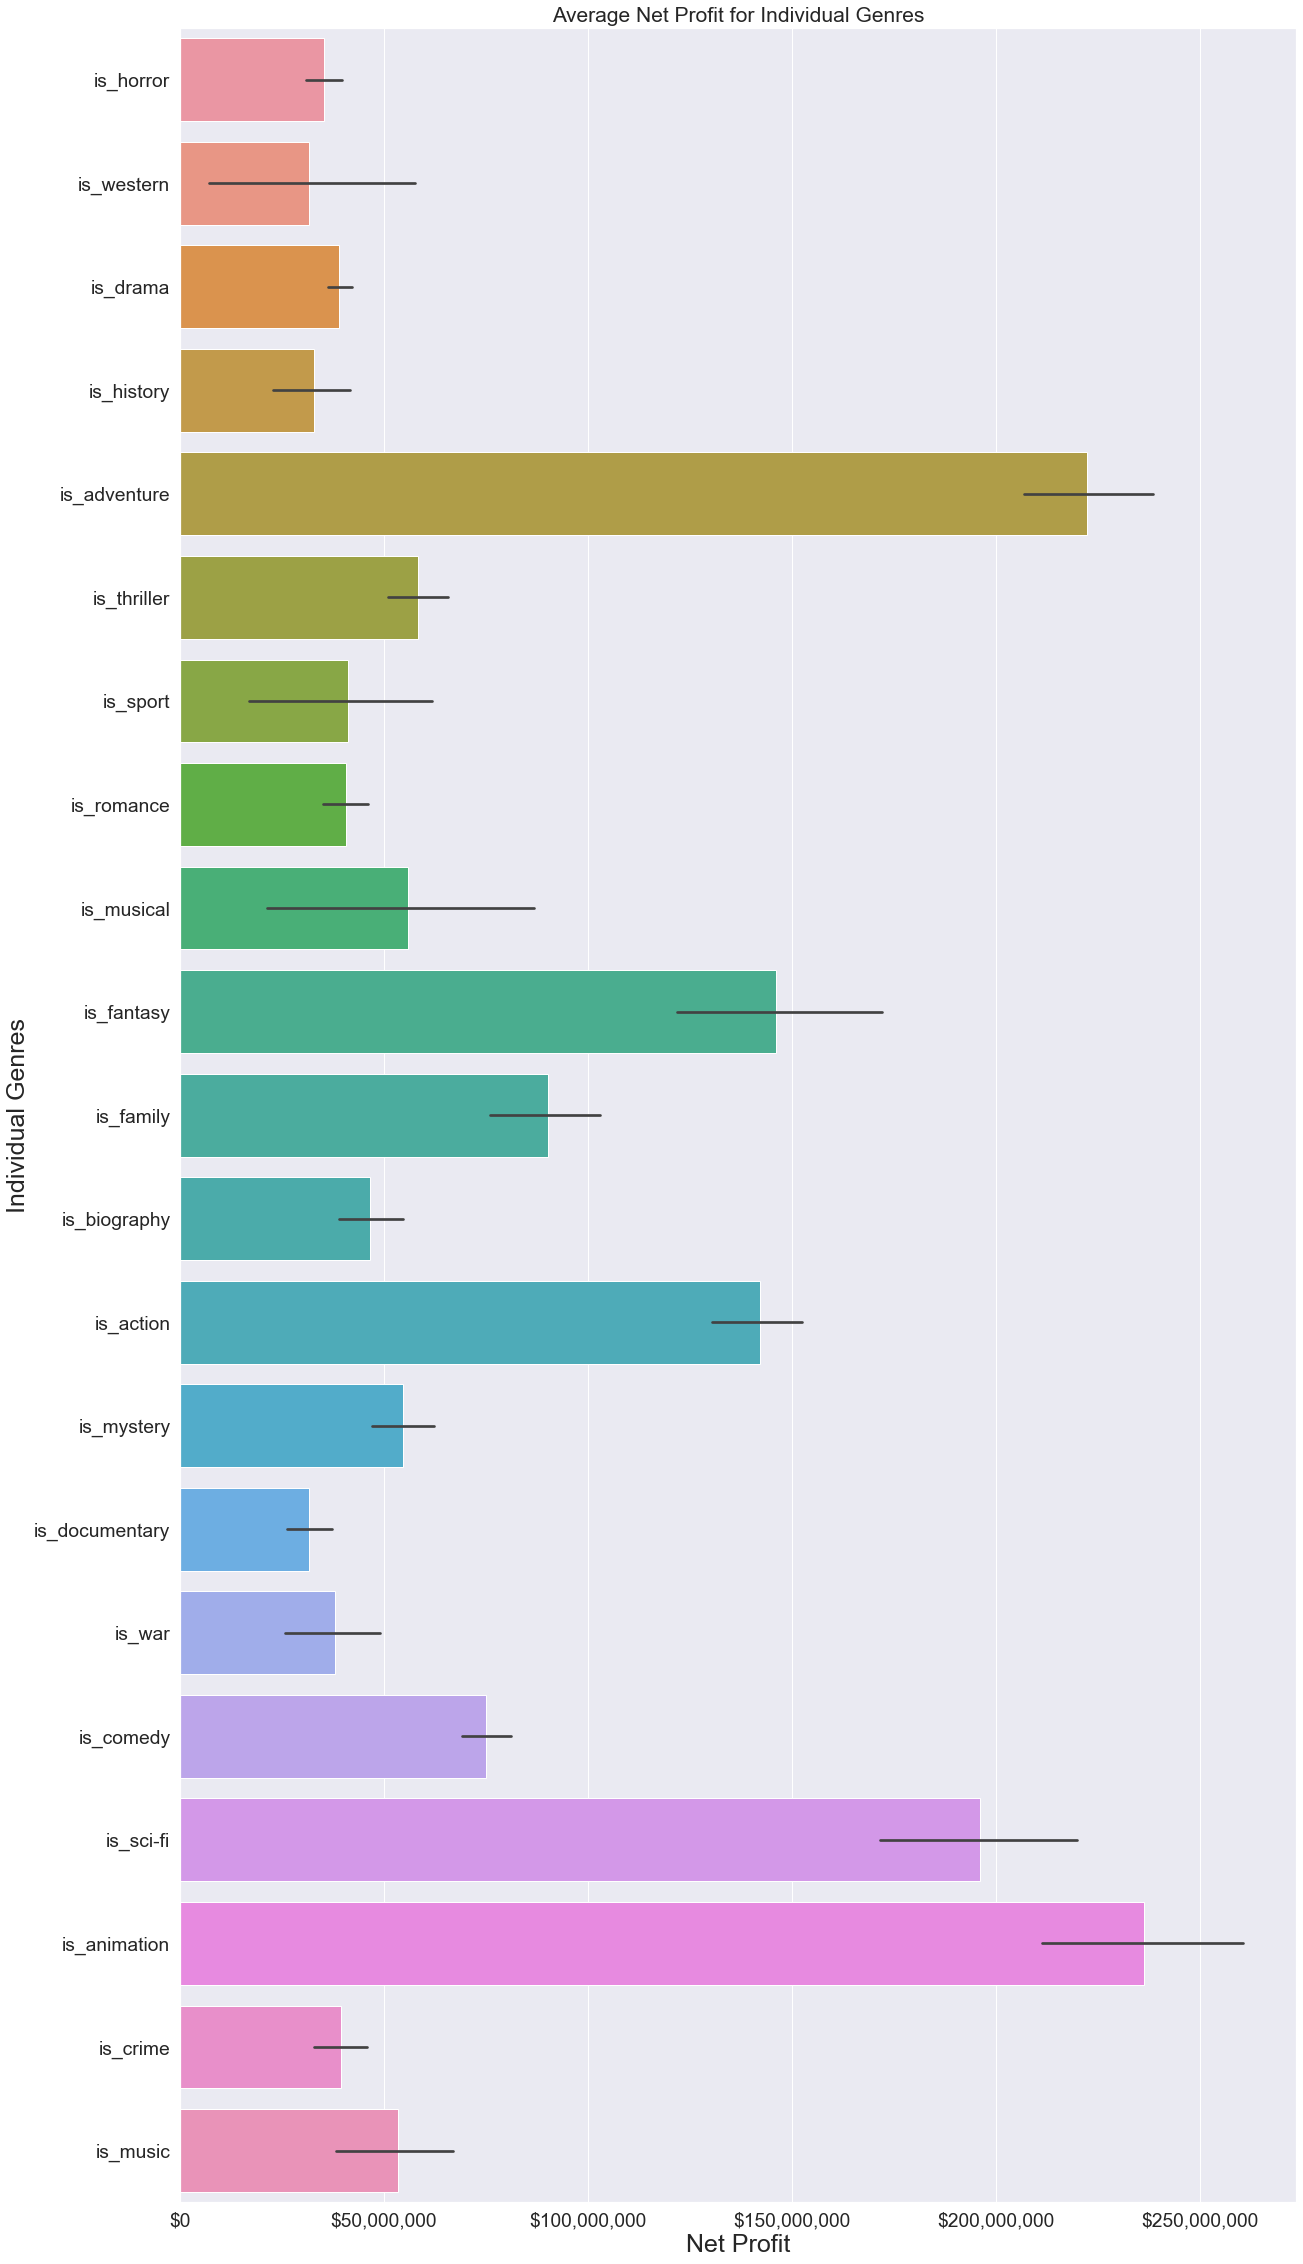

In [95]:
plt.figure(figsize=(20,40))
sns.set(style='darkgrid', font_scale=1.75)
ax = sns.barplot(data=profit_df, orient='h', ci=68)
ax.set_xlabel('Net Profit', fontsize=25)
ax.set_ylabel('Individual Genres', fontsize=25)
ax.set_title('Average Net Profit for Individual Genres')

#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

In [96]:
# plt.figure(figsize=(20,15))
# ax = profit_df.describe().loc['mean'].plot(kind='barh')
# ax.set_title("Mean Profit for Individual Genres");


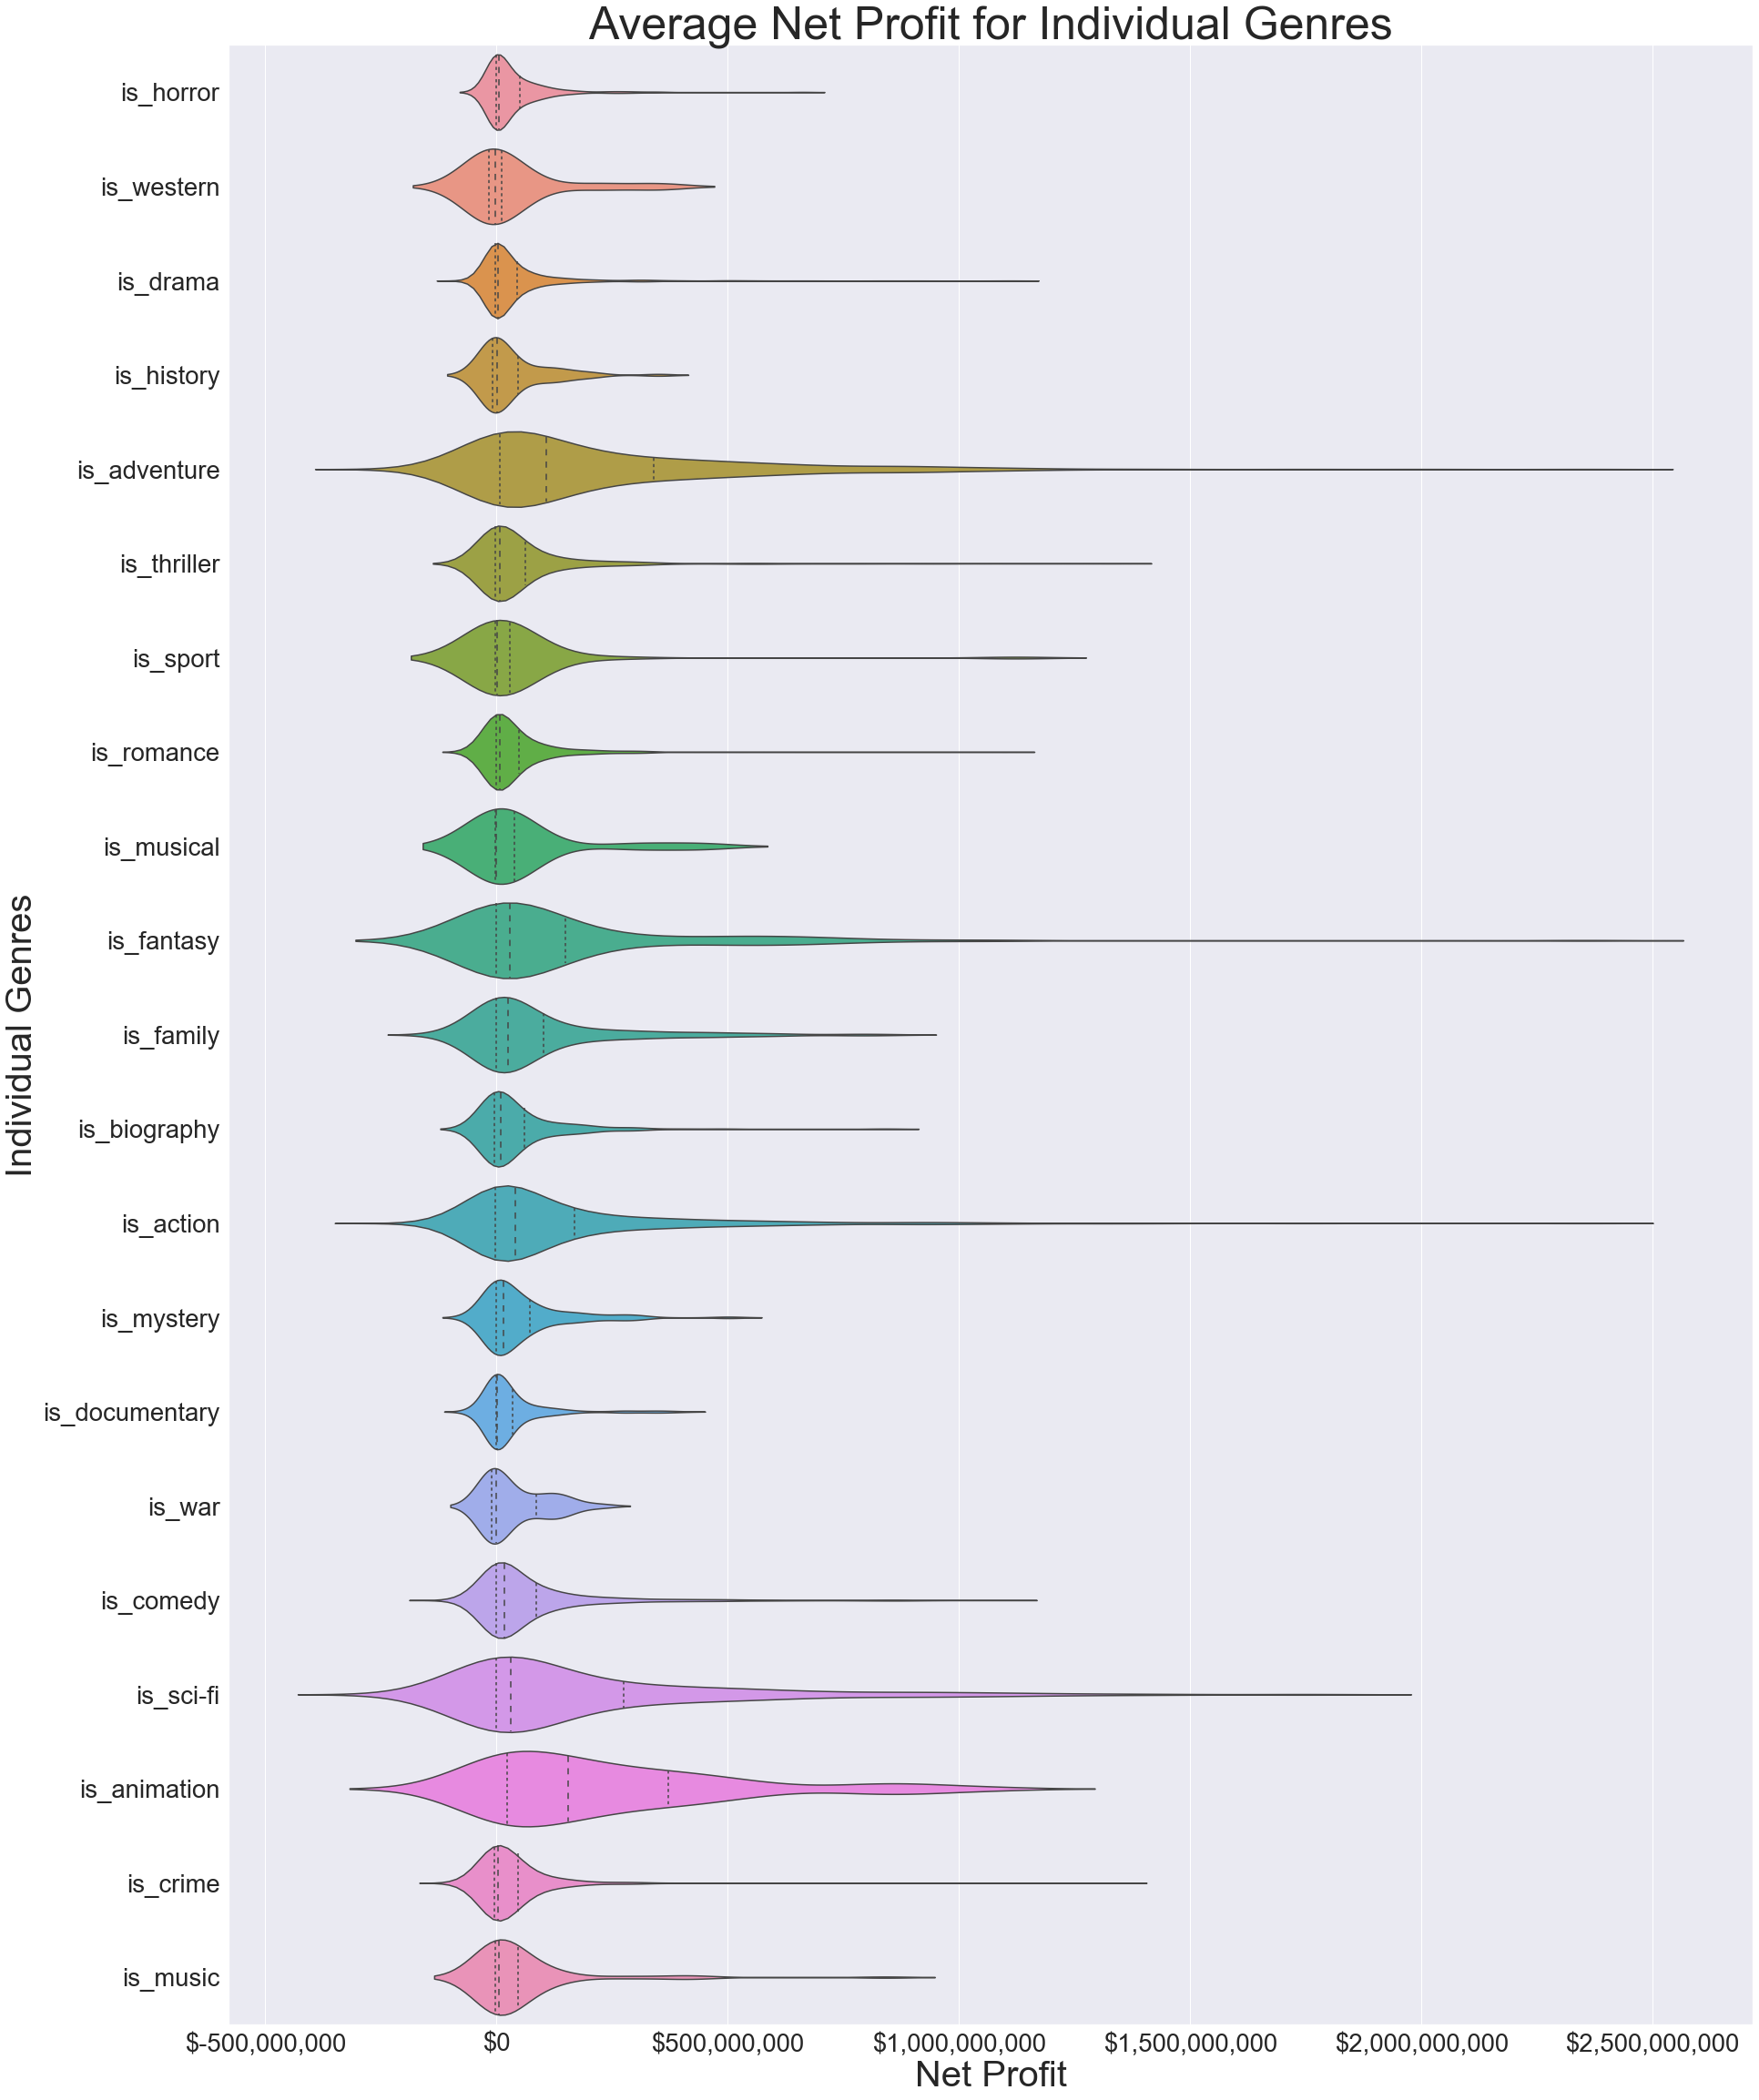

In [97]:
plt.figure(figsize=(30,40))
sns.set(style='darkgrid', font_scale=2.5)
#ax = sns.swarmplot(orient='h',data=profit_df)
ax = sns.violinplot(data=profit_df, orient='h', inner='quartiles', scale='width')
ax.set_title('Average Net Profit for Individual Genres', fontsize=50)
ax.set_ylabel('Individual Genres', fontsize=40)
ax.set_xlabel('Net Profit', fontsize=40)

#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

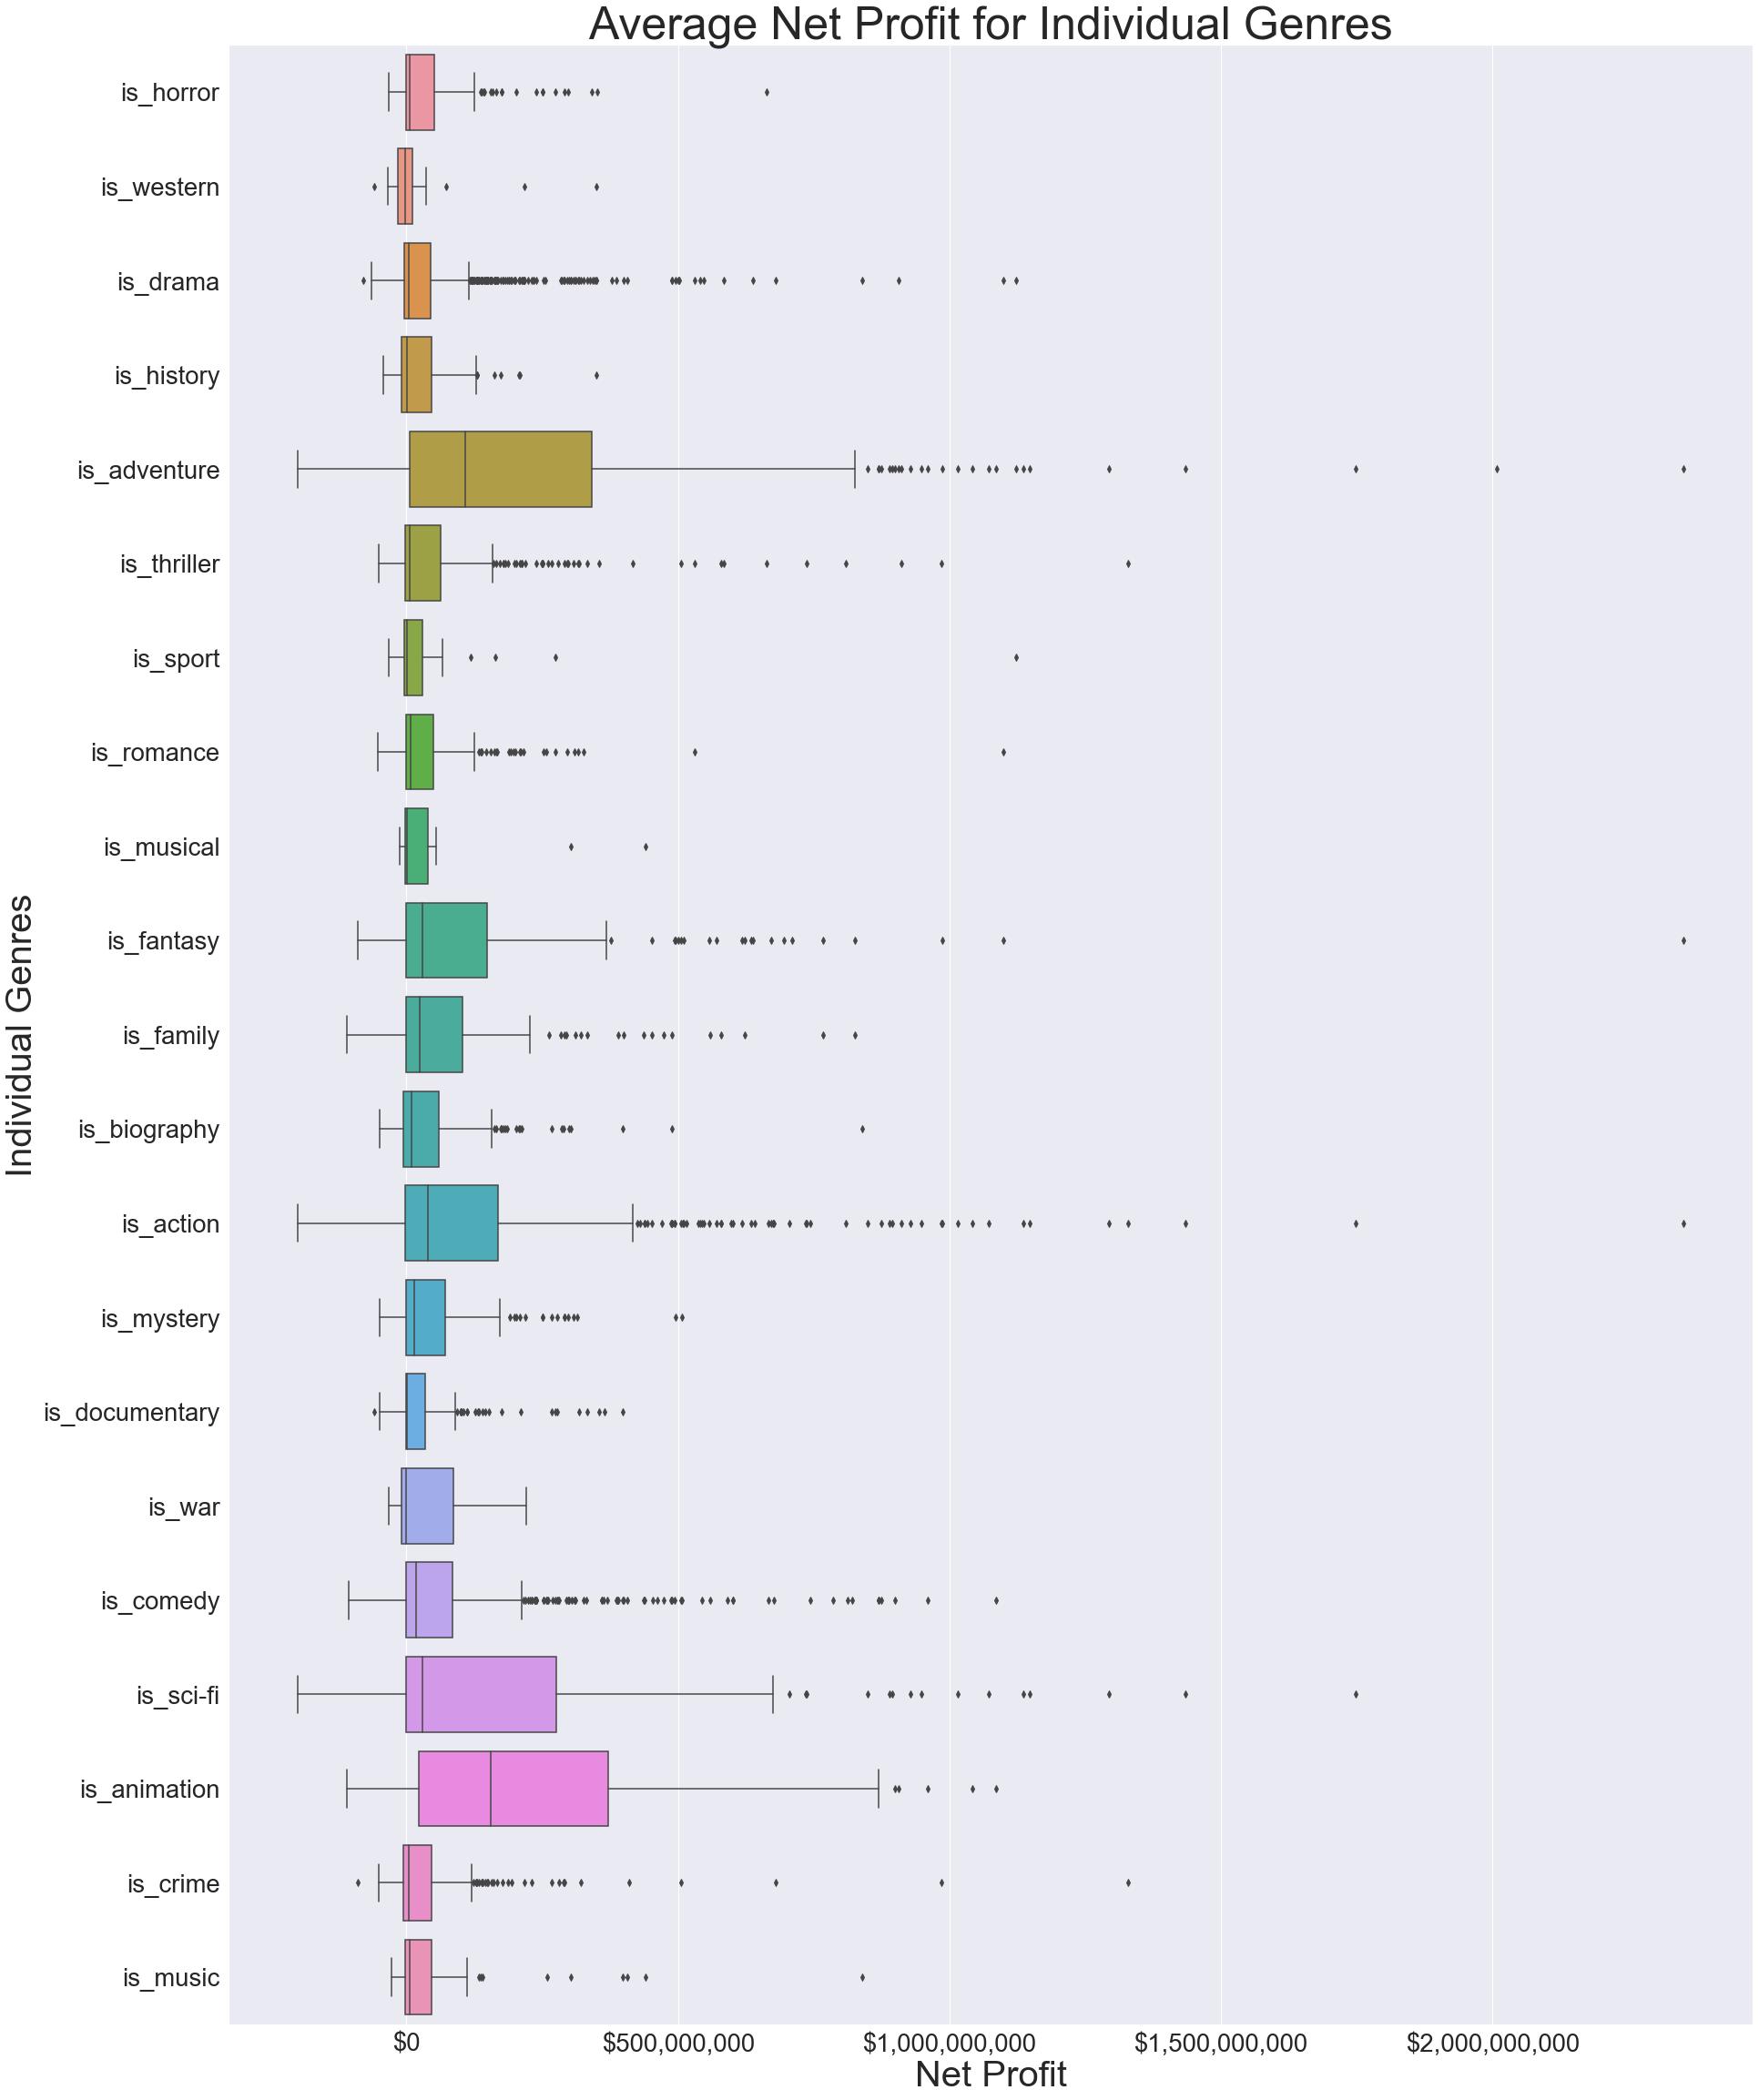

In [98]:
plt.figure(figsize=(30,40))
sns.set(style='darkgrid', font_scale=2.5)
#ax = sns.swarmplot(orient='h',data=profit_df)
ax = sns.boxplot(data=profit_df, orient='h')
ax.set_title('Average Net Profit for Individual Genres', fontsize=50)
ax.set_ylabel('Individual Genres', fontsize=40)
ax.set_xlabel('Net Profit', fontsize=40)

#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

# Finding and Graphing the Total Profit (Average and Median) of Grouped Genres 

### Let's join these two DataFrames to get movie budgets and genres together

In [99]:
new_df = pysqldf("""SELECT *
                    FROM imdb_title_basics_df
                    JOIN tn_movie_budget_df
                    USING(primary_title);""")

#### According to the line below, there are 94 grouped genres that pertain to only 1 movie each.

In [100]:
(new_df['genres'].value_counts() == 1).sum()

83

### Let's make a new column in our new_df called 'tot_profit' that calculates the total profit for each movie by subtracting the production budget from the worldwide gross.

In [101]:
new_df['tot_profit'] = new_df['worldwide_gross'] - new_df['production_budget']

In [102]:
new_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,tot_profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000.0,0.0,73706.0,-44926294.0
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,0.0,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000.0,70433227.0,122133227.0,102133227.0
2,tt0326592,The Overnight,The Overnight,2010,88.0,N/A,21,"Jun 19, 2015",200000.0,1109808.0,1165996.0,965996.0
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000.0,720828.0,9313302.0,-15686698.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",91000000.0,58236838.0,187861183.0,96861183.0


### Now let's make a new graph that groups the data in new_df by 'genres' and gives us the mean, median, min, and max values of 'tot_profit' for each genre.

In [103]:
graph_df = new_df.groupby('genres').tot_profit.describe()

In [104]:
graph_df.head()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,19.0,2.540742e+07,7.051044e+07,-49318920.0,-4811493.0,5900000.0,2.465805e+07,2.674165e+08
"Action,Adventure",4.0,9.181869e+07,1.685852e+08,-4488226.0,-3106384.0,14122819.5,1.090479e+08,3.435174e+08
"Action,Adventure,Animation",17.0,3.222576e+08,2.601914e+08,-29351401.0,114247755.0,377599142.0,4.380684e+08,1.042521e+09
"Action,Adventure,Biography",4.0,1.406284e+08,1.863061e+08,-10306691.0,11362112.5,87441054.0,2.167074e+08,3.979383e+08
"Action,Adventure,Comedy",30.0,2.308928e+08,2.740840e+08,-106900000.0,-4375000.0,155743730.0,3.816450e+08,8.744962e+08


In [105]:
graph_df.reset_index(inplace=True)

### We are going to make a new df called 'graph_df' strictly for using in a graph, and we are only looking at the top 25 grouped genres using mean and median values of 'tot_profit' by sorting the values of graph_df['mean] and graph_df['50%'] and setting the parameter ascending equal to False.

In [106]:
# plt.figure(figsize=(20,15))
# sns.set(style='darkgrid', font_scale=2)
# ax = sns.barplot(x='mean', y='genres', data=graph_df.sort_values('mean', ascending=False).head(25))
# ax.set_title("Average Total Profit In Top 25 Grouped Genres", fontsize=30)
# ax.set_xlabel('Average Profit (1.0 = 1 Billion Dollars)', fontsize=25)
# ax.set_ylabel('Top 25 Genres', fontsize=25)
# ax.set(xlim=(0, 1300000000))
# ax.set_xticks(range(0, 1300000000, 100000000))

# plt.show()
# plt.close()

### Here we see the sorted average Total Profit in the top 25 grouped genres. Now Let's do the same thing with median.

In [107]:
# plt.figure(figsize=(20,15))
# sns.set(font_scale=1.8)
# ax = sns.barplot(x='50%', y='genres', data=graph_df.sort_values('50%', ascending=False).head(25))
# ax.set_title("Median Total Profit In Top 25 Grouped Genres", fontsize=25)
# ax.set_xlabel('Median Profit (1.0 = 1 Billion Dollars)', fontsize=20)
# ax.set_ylabel('Top 25 Genres', fontsize=20)
# ax.set(xlim=(0, 1300000000))
# sns.set(style='darkgrid')
# ax.set_xticks(range(0, 1300000000, 100000000))
# plt.show()

### So it seems like Fantasy/Romance and Adventure/Drama/Sport are the Top Grouped Genres according to both the mean and median graphs. Just to be safe, let's take a look at the frequency of movies each of the top 25 grouped genres have within 'new_df'.

In [108]:
for genre in graph_df['genres'].head(25):
    test = new_df['genres'] == genre
    print(f"{genre} : Frequency = {test.sum()}")

Action : Frequency = 19
Action,Adventure : Frequency = 4
Action,Adventure,Animation : Frequency = 17
Action,Adventure,Biography : Frequency = 4
Action,Adventure,Comedy : Frequency = 30
Action,Adventure,Crime : Frequency = 7
Action,Adventure,Drama : Frequency = 28
Action,Adventure,Family : Frequency = 6
Action,Adventure,Fantasy : Frequency = 36
Action,Adventure,Horror : Frequency = 3
Action,Adventure,Mystery : Frequency = 4
Action,Adventure,Romance : Frequency = 2
Action,Adventure,Sci-Fi : Frequency = 55
Action,Adventure,Thriller : Frequency = 12
Action,Adventure,Western : Frequency = 3
Action,Animation,Comedy : Frequency = 5
Action,Biography,Comedy : Frequency = 1
Action,Biography,Crime : Frequency = 2
Action,Biography,Documentary : Frequency = 1
Action,Biography,Drama : Frequency = 8
Action,Comedy : Frequency = 8
Action,Comedy,Crime : Frequency = 31
Action,Comedy,Documentary : Frequency = 1
Action,Comedy,Drama : Frequency = 5
Action,Comedy,Family : Frequency = 2


### Just like we thought, many genres contain only 1 movie for that genre, and some happened to do well which ended up distorting the results of the graph. Let's set a threshold which allows only grouped genres that have 25 or more movies within that genre to be counted in the graphs.

In [109]:
# genre_freq = {}
# for genre in new_df['genres']:
#     genre_freq[genre] = genre_freq.get(genre, 0) + 1
# genre_freq_df = pd.DataFrame()

In [110]:
# genre_freq_df = genre_freq_df.append(genre_freq, ignore_index=True).transpose()

In [111]:
#genre_freq_df.reset_index(inplace=True)

In [112]:
# genre_freq_df = genre_freq_df.rename(columns={"index": "genres", 0: "freq"})
# genre_freq_df.head()

In [113]:
# limit_graph_df = pysqldf("""SELECT *
#                            FROM graph_df
#                            WHERE(count>=25)
#                            ORDER BY mean DESC;""")

In [114]:
new_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,tot_profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000.0,0.0,73706.0,-44926294.0
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,0.0,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000.0,70433227.0,122133227.0,102133227.0
2,tt0326592,The Overnight,The Overnight,2010,88.0,N/A,21,"Jun 19, 2015",200000.0,1109808.0,1165996.0,965996.0
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000.0,720828.0,9313302.0,-15686698.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",91000000.0,58236838.0,187861183.0,96861183.0


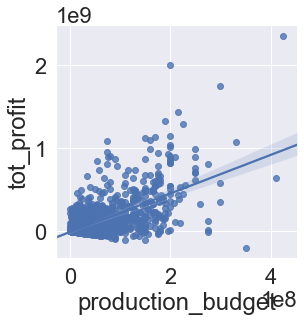

In [152]:
sns.lmplot(x='production_budget', y='tot_profit', data=new_df)

In [115]:
group_cols = [col for col in new_df['genres'].unique()]

In [116]:
new_dict = {}
gb = new_df.groupby('genres')
gb.get_group('Action,Animation,Comedy')['tot_profit']
for genre in group_cols:
    new_dict[genre] = gb.get_group(genre)['tot_profit']

In [117]:
grouped_profit_df = pd.DataFrame(new_dict)

In [118]:
grouped_profit_df.head()

,"Action,Animation,Comedy","Action,Adventure,Fantasy",N/A,"Adventure,Drama,Romance","Adventure,Comedy,Drama","Action,Crime,Drama","Action,Adventure,Sci-Fi","Comedy,Drama","Comedy,Family","Comedy,Drama,Romance",...,Sport,War,"Documentary,Drama,War","Action,Crime,Fantasy","Comedy,Fantasy,Sci-Fi","Biography,Drama,Mystery","Documentary,War","Documentary,Sport,Thriller","Adventure,Animation,Documentary","Comedy,Sport"
0,-44926294.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,102133227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,965996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,-15686698.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,96861183.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
for col in grouped_profit_df:
    if grouped_profit_df[col].describe()['count'] < 25:
        grouped_profit_df = grouped_profit_df.drop(columns=col)
    else:
        continue
grouped_profit_df.describe()

,"Action,Adventure,Fantasy",N/A,"Action,Crime,Drama","Action,Adventure,Sci-Fi","Comedy,Drama","Comedy,Drama,Romance","Adventure,Animation,Comedy",Comedy,"Horror,Mystery,Thriller","Action,Adventure,Comedy",...,Drama,"Action,Comedy,Crime","Comedy,Romance","Action,Adventure,Drama","Crime,Drama,Thriller","Drama,Romance","Drama,Thriller",Documentary,Horror,Thriller
count,3.600000e+01,2.500000e+01,4.800000e+01,5.500000e+01,7.300000e+01,6.600000e+01,6.700000e+01,8.400000e+01,3.400000e+01,3.000000e+01,...,1.890000e+02,3.100000e+01,4.500000e+01,2.800000e+01,2.800000e+01,5.700000e+01,4.000000e+01,9.600000e+01,4.600000e+01,3.100000e+01
mean,2.940891e+08,7.608308e+07,2.868300e+07,4.586273e+08,2.469096e+07,2.536191e+07,2.631963e+08,3.194110e+07,7.825486e+07,2.308928e+08,...,2.115530e+07,5.632260e+07,5.728036e+07,7.770115e+07,1.066182e+07,3.712137e+07,2.352243e+07,3.116388e+07,2.715741e+07,1.418892e+07
std,4.325012e+08,1.593792e+08,4.939935e+07,4.217260e+08,4.041561e+07,4.849227e+07,2.804611e+08,6.110542e+07,8.917204e+07,2.740840e+08,...,5.843857e+07,7.203495e+07,7.463512e+07,1.378552e+08,3.268113e+07,7.017389e+07,6.680132e+07,7.236045e+07,4.479147e+07,3.524063e+07
min,-2.664387e+07,-3.165737e+07,-4.322557e+07,-2.002376e+08,-2.505758e+07,-2.503251e+07,-3.585151e+07,-4.346723e+07,-2.750799e+07,-1.069000e+08,...,-7.944858e+07,-2.960387e+07,-2.586456e+07,-6.448372e+07,-3.421347e+07,-2.490888e+07,-2.365923e+07,-4.857291e+07,-2.649114e+07,-2.900000e+07
25%,3.864256e+07,-2.633444e+06,-5.856668e+06,1.433662e+08,-2.156855e+06,-9.731510e+05,5.003296e+07,-2.034467e+06,7.594988e+06,-4.375000e+06,...,-3.202561e+06,1.521925e+06,2.628828e+06,-7.244840e+06,-7.883247e+06,-2.010965e+06,-4.660598e+06,-1.390290e+06,-1.075000e+06,-1.600000e+06
50%,1.493293e+08,3.320293e+06,1.231547e+07,3.645375e+08,1.002312e+07,3.913044e+06,1.518966e+08,7.069228e+06,5.565537e+07,1.557437e+08,...,8.459600e+04,5.033245e+07,2.868098e+07,2.147304e+07,-6.349775e+05,1.053150e+07,-2.188125e+05,5.883405e+05,4.717180e+06,1.755870e+05
75%,4.057047e+08,4.113406e+07,4.659156e+07,6.903455e+08,4.183723e+07,3.306992e+07,3.662264e+08,4.715553e+07,9.835332e+07,3.816450e+08,...,2.233687e+07,7.816017e+07,8.299074e+07,1.147192e+08,3.338696e+07,4.416869e+07,2.073310e+07,3.546296e+07,3.399001e+07,1.968660e+07
max,2.351345e+09,6.230081e+08,1.941042e+08,1.748134e+09,1.635498e+08,2.154125e+08,1.086336e+09,2.610695e+08,2.980001e+08,8.744962e+08,...,3.858990e+08,2.813339e+08,2.571320e+08,5.406446e+08,1.155669e+08,3.263985e+08,3.182667e+08,3.652802e+08,1.745120e+08,1.364397e+08


In [120]:
grouped_profit_df = grouped_profit_df.drop(columns='N/A')

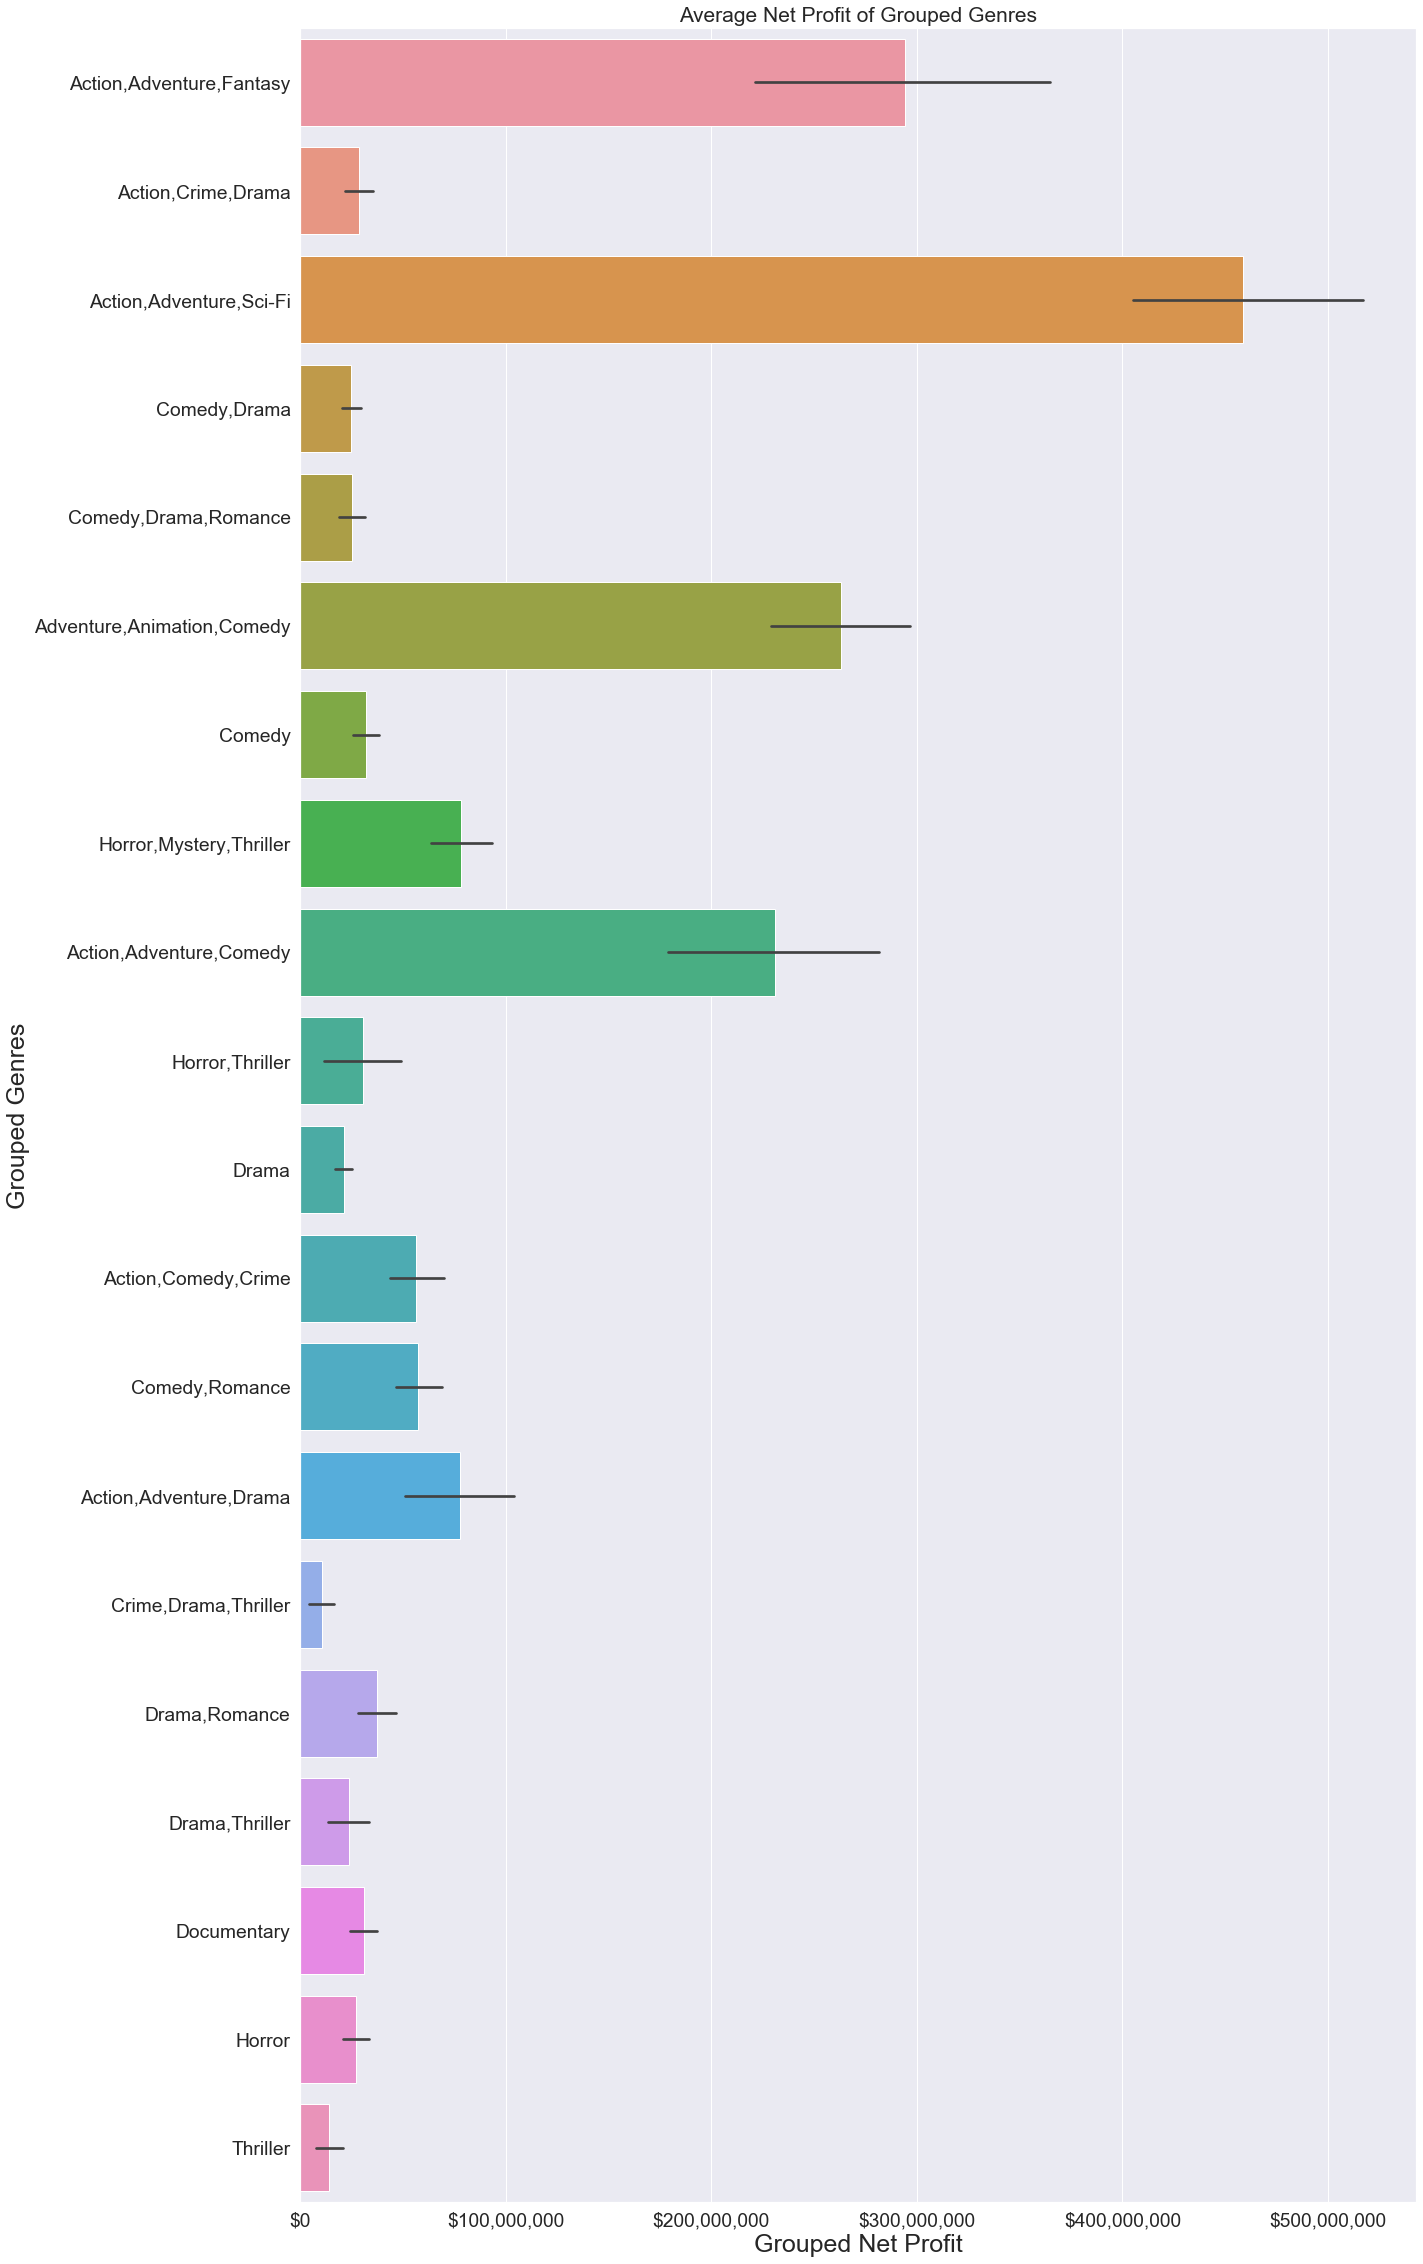

In [121]:
plt.figure(figsize=(20,40))
sns.set(style='darkgrid', font_scale=1.75)
ax = sns.barplot(data=grouped_profit_df, orient='h', ci=68)
ax.set_xlabel('Grouped Net Profit', fontsize=25)
ax.set_ylabel('Grouped Genres', fontsize=25)
ax.set_title('Average Net Profit of Grouped Genres')

#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);
# ax.set(xlim=(0, 600000000))
# ax.set_xticks(range(0, 600000000, 50000000));

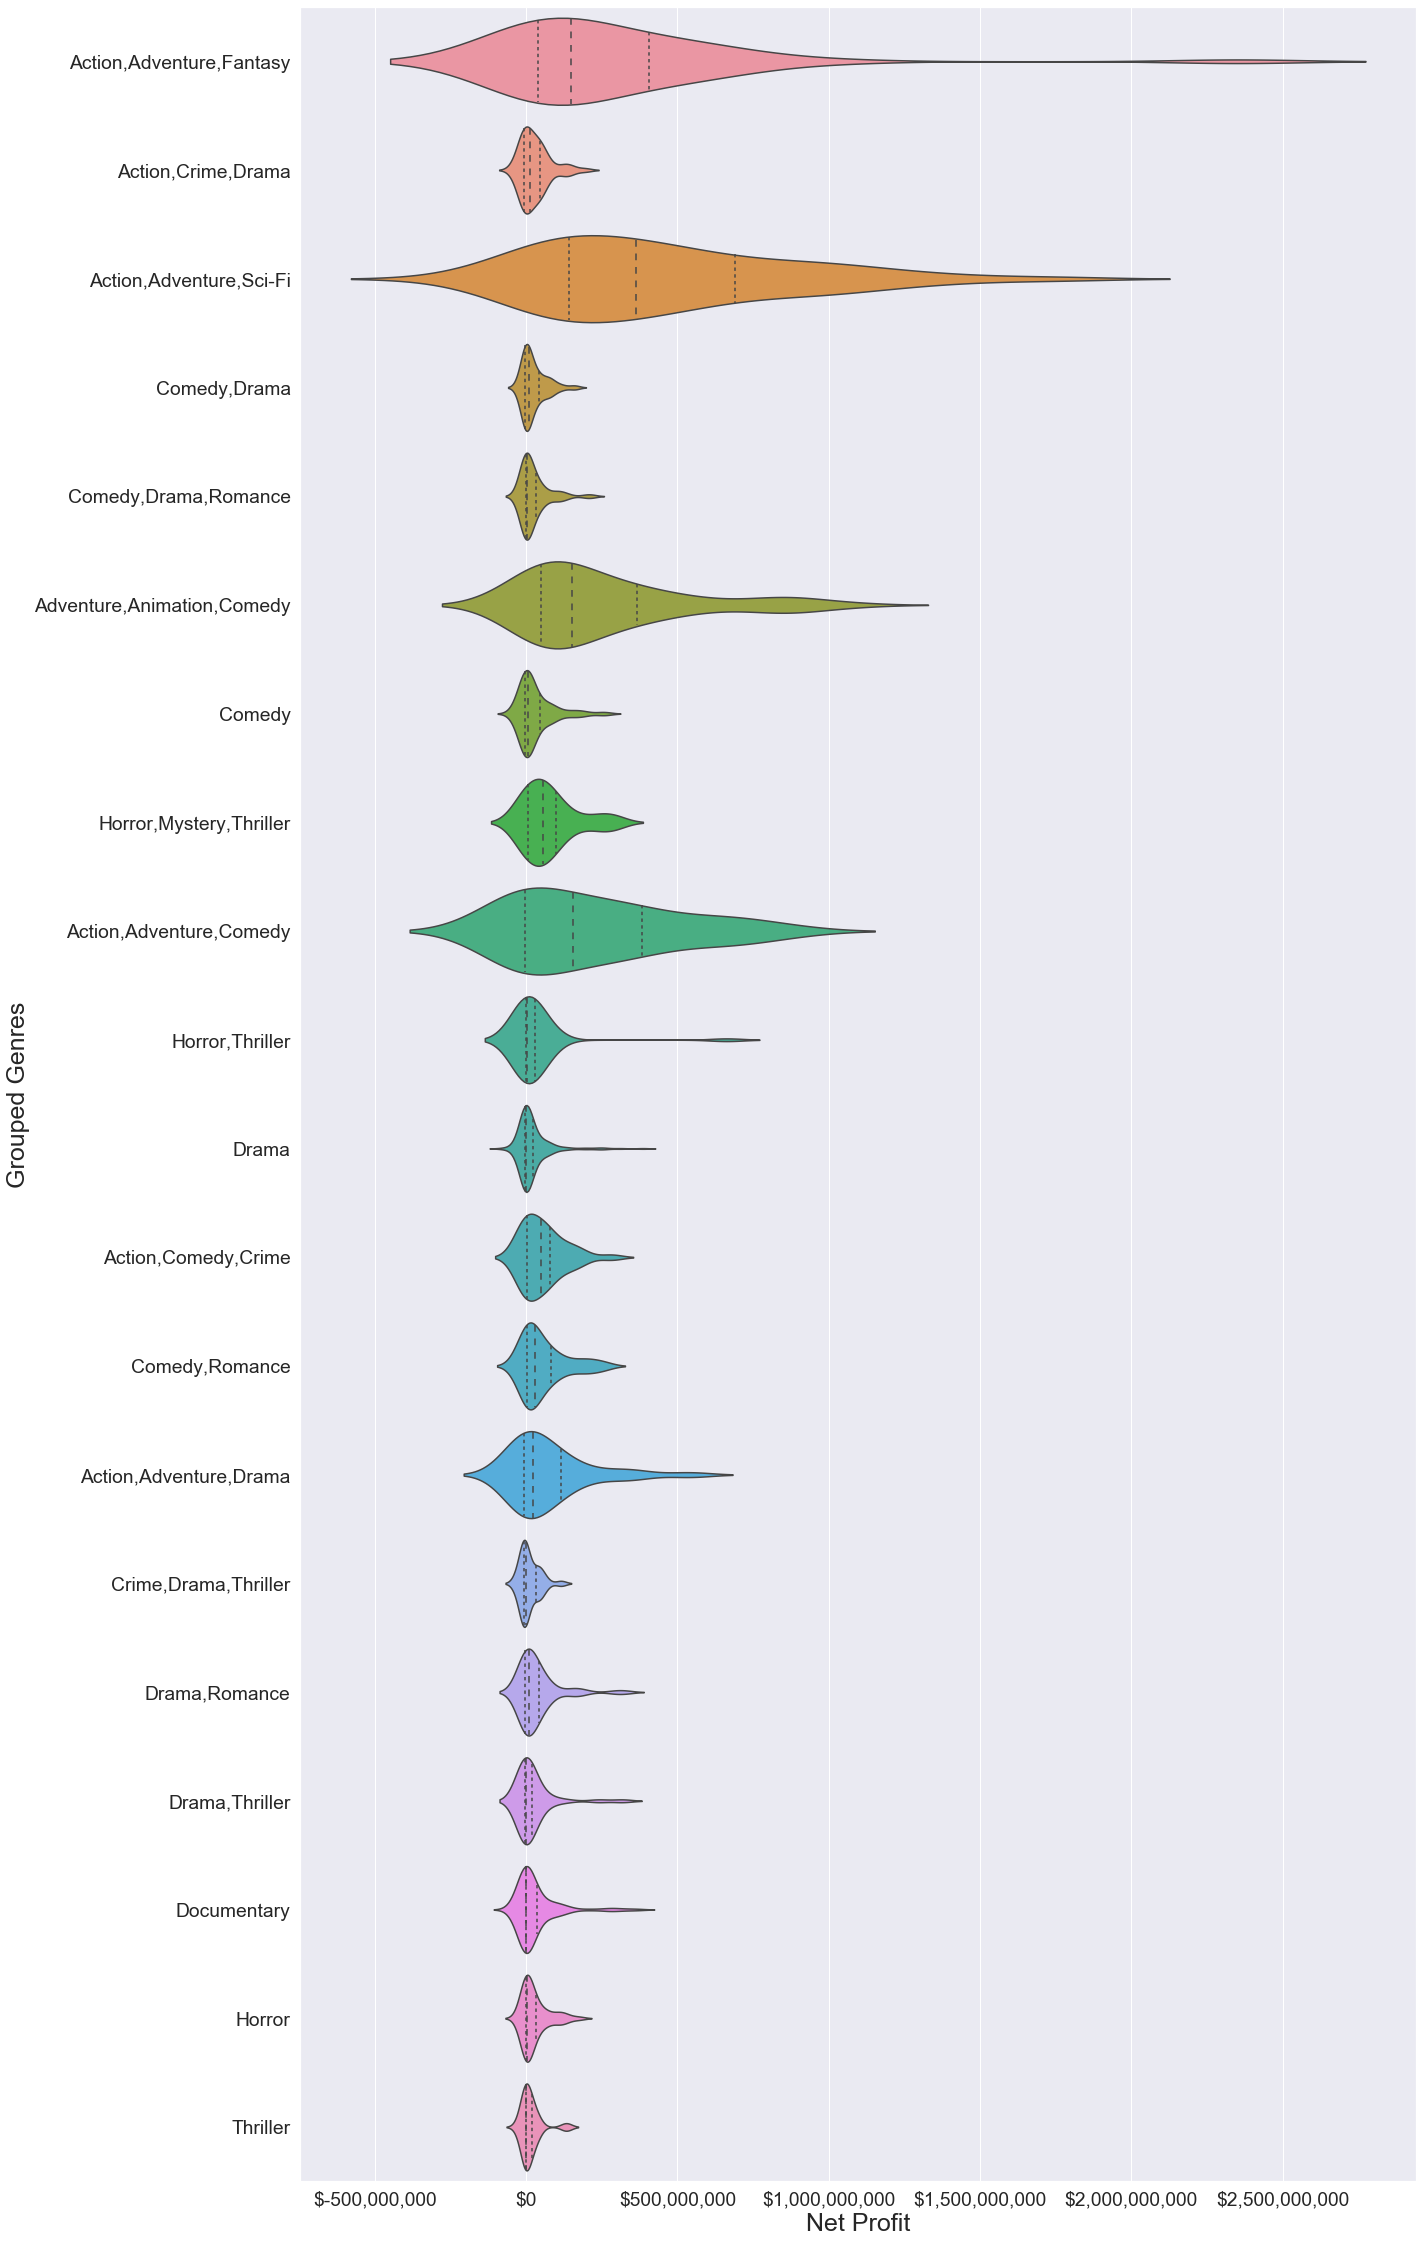

In [122]:
plt.figure(figsize=(20,40))
sns.set(style='darkgrid', font_scale=1.75)
#ax = sns.swarmplot(data=grouped_profit_df, orient='h')
ax = sns.violinplot(data=grouped_profit_df, inner='quartiles', orient='h', scale='width')
ax.set_xlabel('Net Profit', fontsize=25)
ax.set_ylabel('Grouped Genres', fontsize=25)

#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);
#ax.set(xlim=(0, 600000000))
#ax.set_xticks(range(0, 600000000, 50000000));

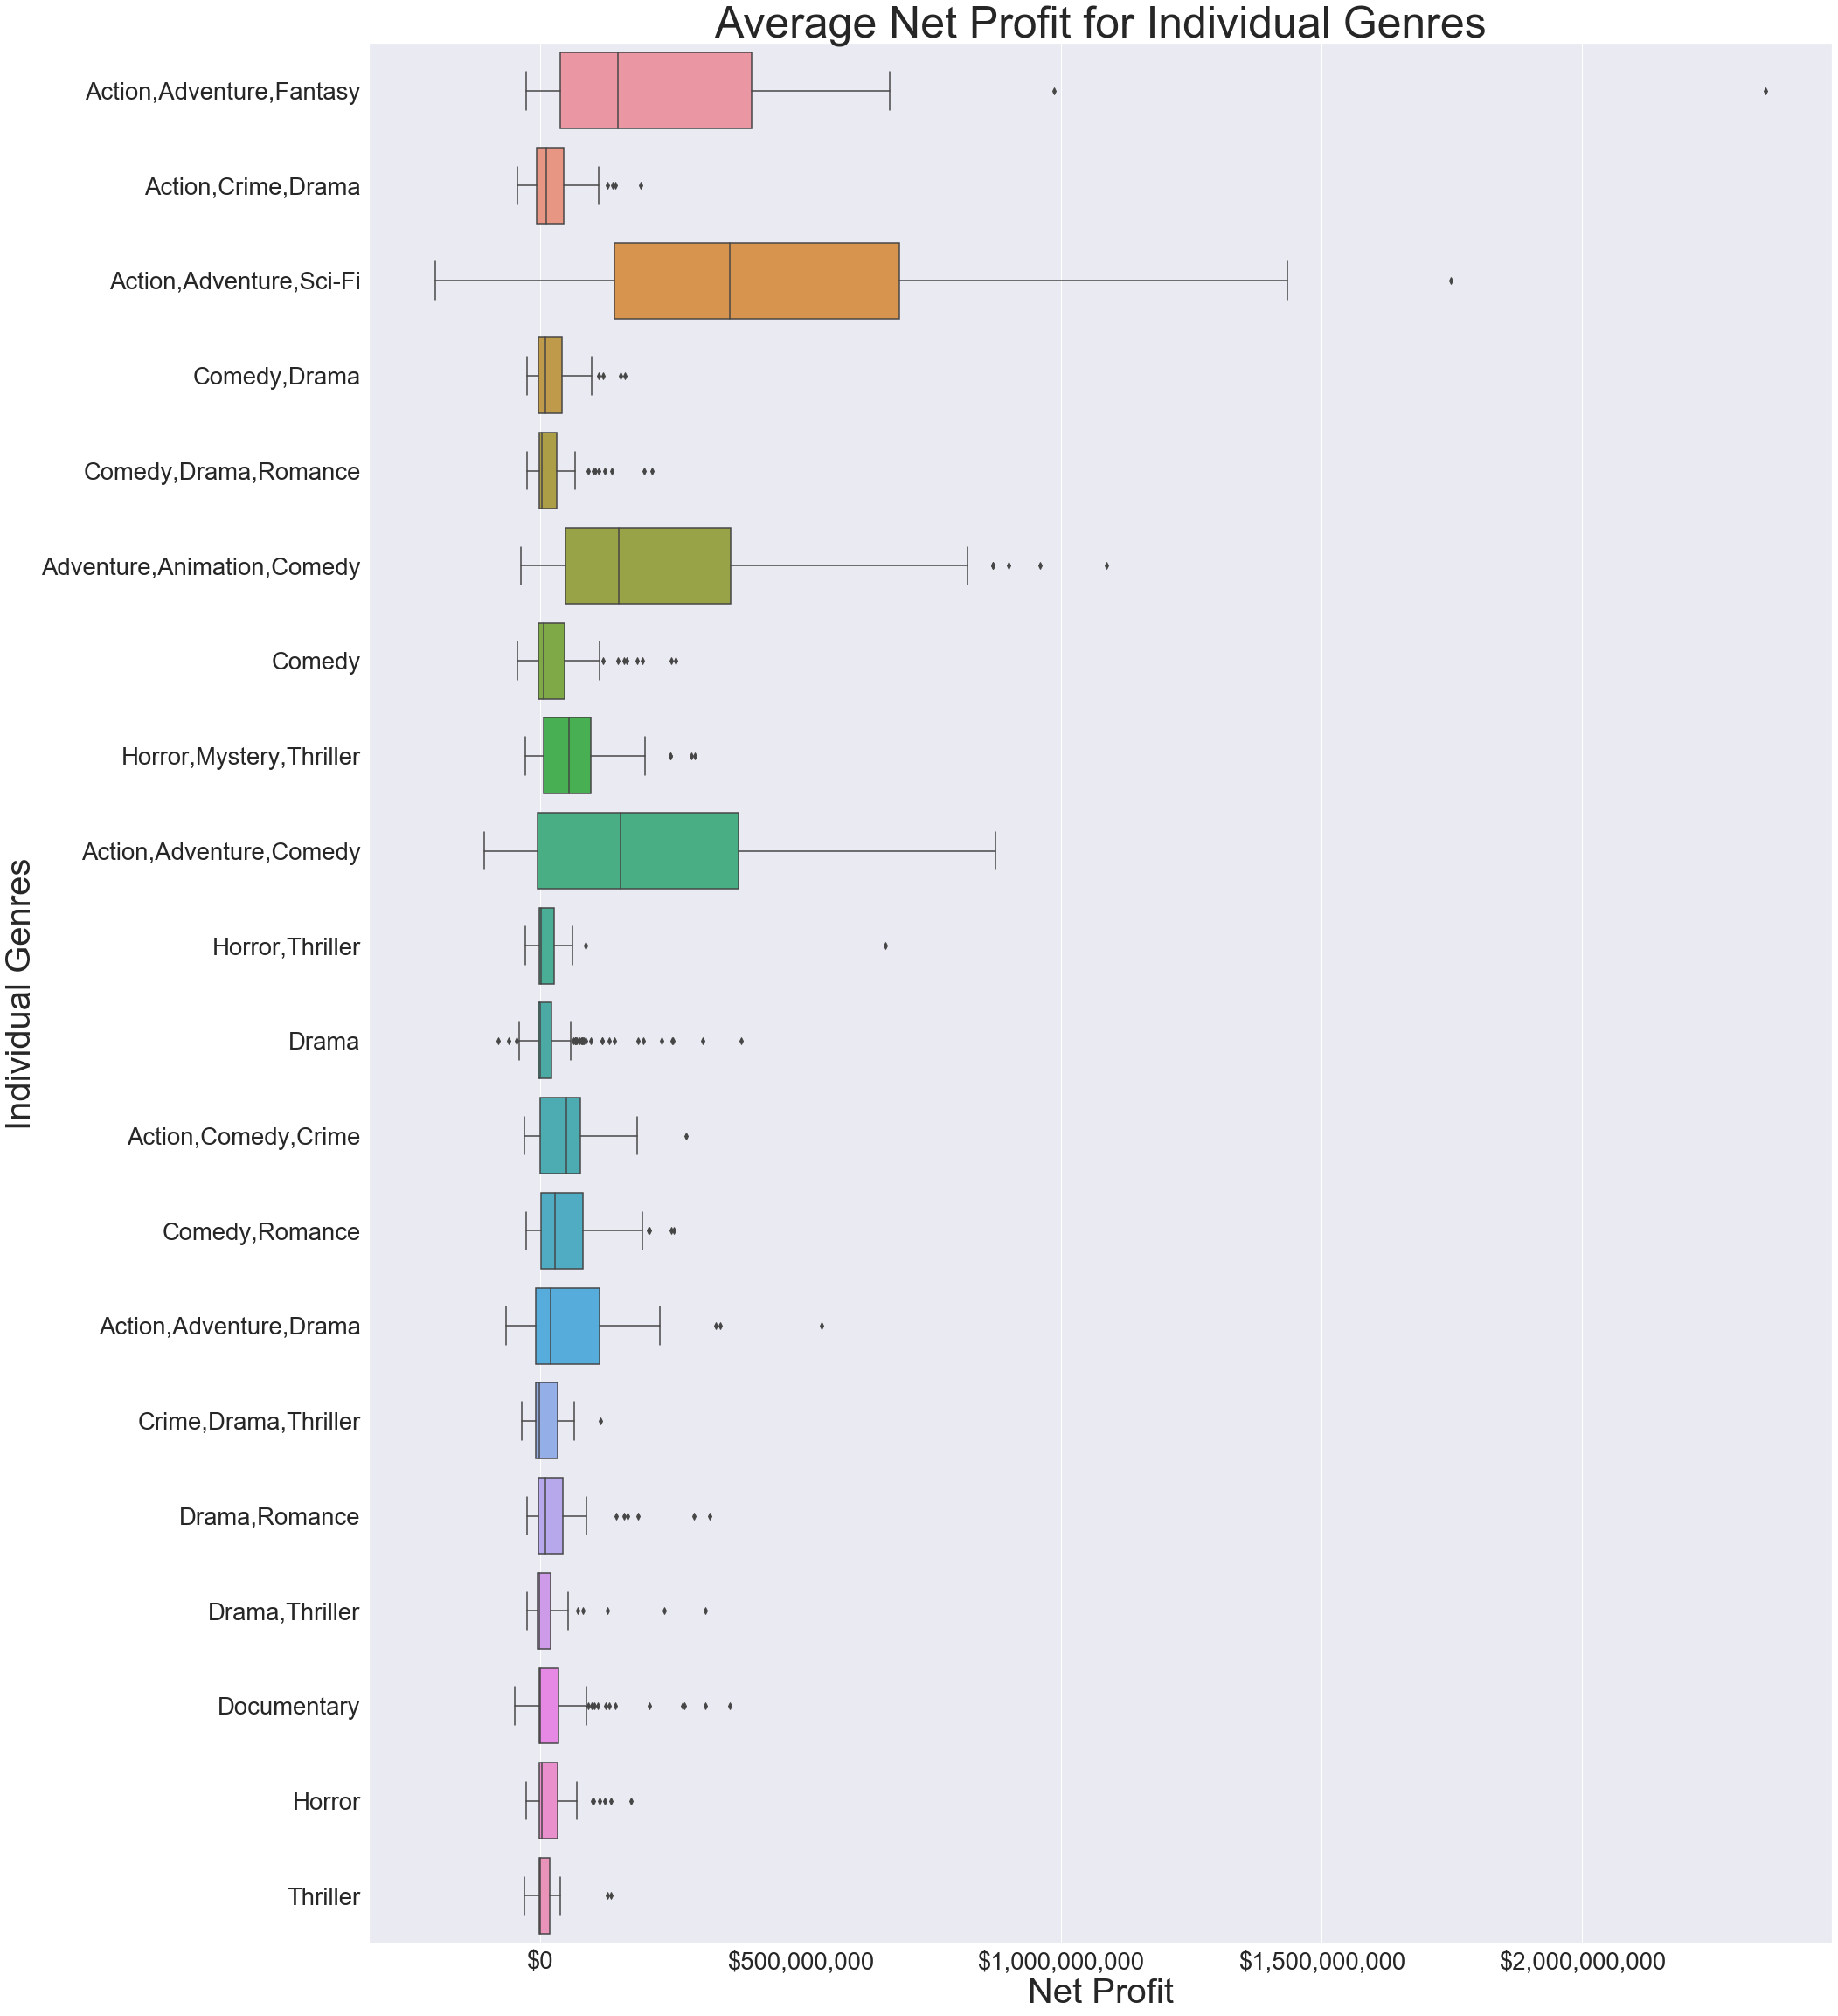

In [123]:
plt.figure(figsize=(30,40))
sns.set(style='darkgrid', font_scale=2.5)
#ax = sns.swarmplot(orient='h',data=profit_df)
ax = sns.boxplot(data=grouped_profit_df, orient='h')
ax.set_title('Average Net Profit for Individual Genres', fontsize=50)
ax.set_ylabel('Individual Genres', fontsize=40)
ax.set_xlabel('Net Profit', fontsize=40)

#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

# Question 2: What is the strength of the regression line between popularity and average rating based on the Number of votes?

# Question 3: Which directors from the top 4 grouped movie genres (according to our previous graphs) have the highest ratings?

## Our files of interest for this question would be: imdb_title_rating, imdb_title_crew, and imdb_title_basics_df

In [124]:
imdb_title_rating_df.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [125]:
imdb_title_crew_df.head(3)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585


In [126]:
tmbd_movies_df.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [127]:
imdb_title_df.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [128]:
imdb_title_df['region'].value_counts()

US      51490
XWW     18467
RU      13817
DE      11634
FR      10990
        ...  
SUHH        1
XNA         1
TO          1
MQ          1
CF          1
Name: region, Length: 213, dtype: int64

In [129]:
crew_rating = pysqldf("""SELECT *
                         FROM imdb_title_rating_df 
                         JOIN imdb_title_crew_df c
                         USING(tconst)
                         JOIN imdb_name_df i
                         ON(c.directors = i.nconst);""")

In [130]:
crew_rating.head()

,tconst,averagerating,numvotes,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt10356526,8.3,31,nm8353804,"nm3057599,nm4179342",nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management","tt10356526,tt8749962,tt9579874,tt5231224"
1,tt1042974,6.4,20,nm1915232,nm1915232,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer","tt1042974,tt1538868,tt0949872,tt0458519"
2,tt1043726,4.2,50352,nm0001317,"nm0393517,nm0316417,nm0001317,nm1048866",nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer","tt2238032,tt0149261,tt0099423,tt0106582"
3,tt1060240,6.5,21,nm1926349,nm1926349,nm1926349,Carlos M. Barros,NaN,NaN,"director,writer,casting_director","tt1612376,tt1823187,tt0460544,tt1060240"
4,tt1069246,6.2,326,nm0868643,"nm2726004,nm0140502,nm1523568,nm0868643",nm0868643,Fina Torres,1951.0,NaN,"writer,director,producer","tt0089739,tt0107537,tt2325833,tt1069246"


In [131]:
dir_rating_df = pysqldf("""SELECT tconst, averagerating, numvotes, primary_name as 'director'
                           FROM crew_rating;""")

# Test Area 1

In [132]:
len(imdb_title_basics_df)

136071

In [133]:
imdb_title_basics_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [134]:
len(dir_rating_df)

64996

In [135]:
gen_dir_rating_df = pysqldf('''SELECT genres, d.*
                               FROM imdb_title_basics_df 
                               JOIN dir_rating_df d
                               USING(tconst);''')

In [136]:
len(gen_dir_rating_df)

60444

In [137]:
test_rating_df = pysqldf('''SELECT tconst, averagerating, numvotes, director, genres
                            FROM gen_dir_rating_df
                            WHERE genres = 'Action,Adventure,Comedy' 
                            OR genres = 'Action,Adventure,Sci-Fi' 
                            OR genres = 'Action,Adventure,Fantasy' 
                            OR genres = 'Adventure,Animation,Comedy';''')

In [138]:
for col in test_rating_df:
    print(f'{col}: {test_rating_df[col].duplicated().sum()}')

tconst: 0
averagerating: 479
numvotes: 89
director: 69
genres: 546


In [139]:
new_test_rating = pysqldf("""SELECT *
                             FROM test_rating_df
                             WHERE numvotes > 16000
                             GROUP BY (director);""")

In [140]:
new_test_rating = new_test_rating.sort_values('averagerating',ascending=False).reset_index(drop=True)

In [141]:
new_test_rating['genres'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Animation,Comedy',
       'Action,Adventure,Comedy', 'Action,Adventure,Fantasy'],
      dtype=object)

In [142]:
new_test_rating

,tconst,averagerating,numvotes,director,genres
0,tt1375666,8.8,1841066,Christopher Nolan,"Action,Adventure,Sci-Fi"
1,tt0435761,8.3,682218,Lee Unkrich,"Adventure,Animation,Comedy"
2,tt1392190,8.1,780910,George Miller,"Action,Adventure,Sci-Fi"
3,tt2015381,8.1,948394,James Gunn,"Action,Adventure,Comedy"
4,tt0848228,8.1,1183655,Joss Whedon,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
116,tt0816462,5.2,90834,Marcus Nispel,"Action,Adventure,Fantasy"
117,tt1562871,4.8,35625,Anubhav Sinha,"Action,Adventure,Sci-Fi"
118,tt1302067,4.6,18934,Eric Brevig,"Adventure,Animation,Comedy"
119,tt1043726,4.2,50352,Renny Harlin,"Action,Adventure,Fantasy"


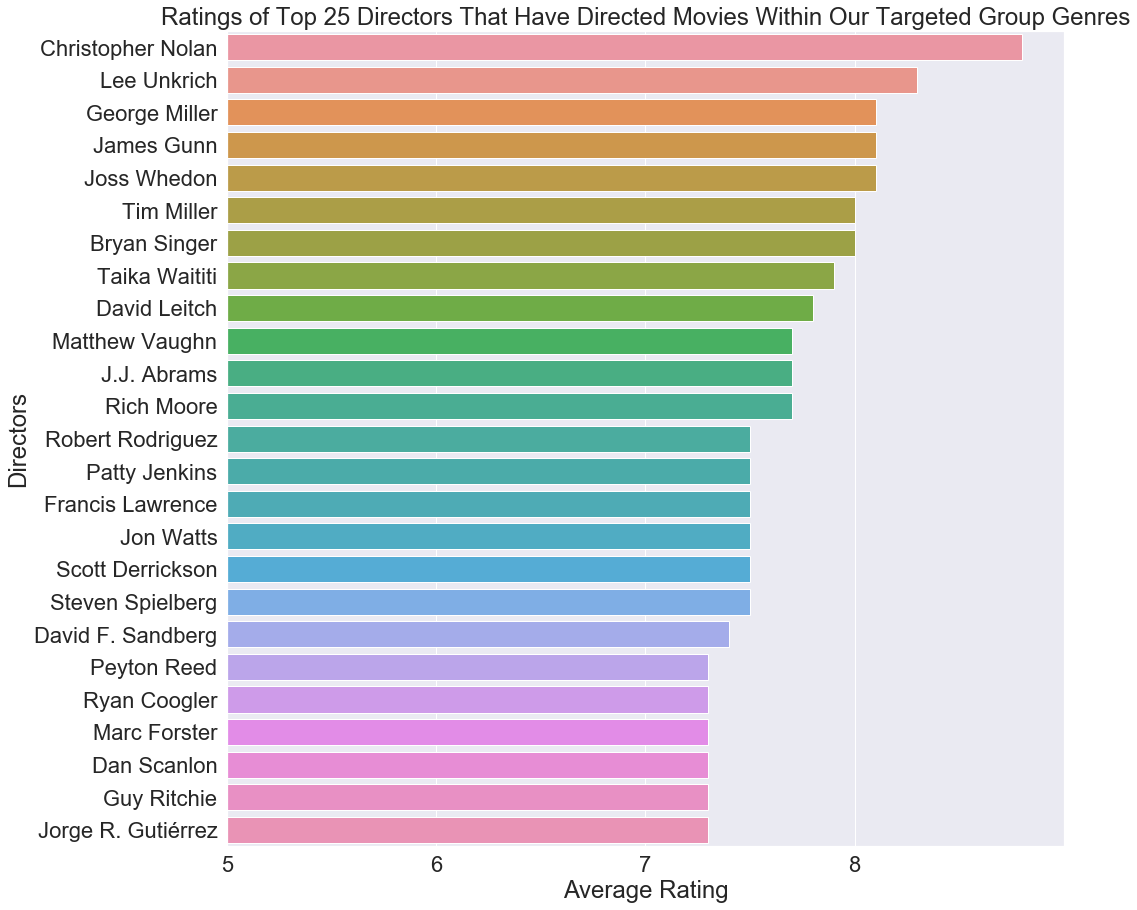

In [143]:
plt.figure(figsize=(15,15))
sns.set(style='darkgrid', font_scale = 2)
ax = sns.barplot(x='averagerating', y='director',data=new_test_rating.head(25), orient='h', ci=None)
ax.set_xlabel('Average Rating')
ax.set_ylabel('Directors')
ax.set_title('Ratings of Top 25 Directors That Have Directed Movies Within Our Targeted Group Genres')
ax.set(xlim=(5.0, 9.0))
ax.set_xticks(range(5, 9, 1));

In [144]:
# for item in imdb_title_basics_df['genres'].unique():
#     print(item)

# Test Area 2

In [145]:
tmbd_movies_df.sort_values('popularity', ascending=False)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...
13877,[10749],401741,en,Crème Caramel,0.600,2014-05-20,Crème Caramel,5.0,1
13878,[878],401427,en,Elegy,0.600,2014-09-10,Elegy,5.0,1
13879,[35],399054,en,Jaguar,0.600,2014-09-21,Jaguar,5.0,1
13880,[],381154,en,Unleashed! A Dog Dancing Story,0.600,2014-02-13,Unleashed! A Dog Dancing Story,5.0,1


<Figure size 1440x1440 with 0 Axes>

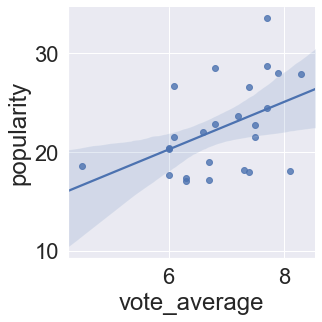

In [146]:
plt.figure(figsize=(20,20))
sns.set(font_scale = 2)
ax = sns.lmplot(x = 'vote_average', y='popularity',data = tmbd_movies_df.head(25))

# Test Area 3

In [147]:
grouped_gen_dir_df = test_rating_df.groupby('director')

In [148]:
grouped_gen_dir_df.head()

,tconst,averagerating,numvotes,director,genres
0,tt0137204,8.1,263,Anthony Harrison,"Adventure,Animation,Comedy"
1,tt0331314,5.0,302,Louis Ross,"Adventure,Animation,Comedy"
2,tt0369610,7.0,539338,Colin Trevorrow,"Action,Adventure,Sci-Fi"
3,tt0377981,6.0,49550,Kelly Asbury,"Adventure,Animation,Comedy"
4,tt0401729,6.6,241792,Andrew Stanton,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
545,tt9396244,6.5,10,Alexandr Romanets,"Adventure,Animation,Comedy"
546,tt9409854,4.8,60,Yang Xiao,"Action,Adventure,Comedy"
547,tt9646548,5.1,137,Özgür Dogruöz,"Adventure,Animation,Comedy"
548,tt9670282,3.3,101,Glenn Miller,"Action,Adventure,Comedy"


In [149]:
gen_dir_list = grouped_gen_dir_df['director'].unique()
gen_dir_list = gen_dir_list.tolist()
len(gen_dir_list)

481

In [150]:
type(gen_dir_list)

list

In [151]:
for i in range(len(grouped_gen_dir_df.get_group('Tarik Hatipoglu')['averagerating'])):
    test_dict[i] = grouped_gen_dir_df.get_group('Tarik Hatipoglu')['averagerating'].iloc[i]

NameError: name 'test_dict' is not defined

In [ ]:
test_dict

In [ ]:
dict_gen_dir_list = []
i=0
while i < len(gen_dir_list):
    dict_gen_dir_list.append(gen_dir_list[i][0])
    i+=1
dict_gen_dir_list = set(dict_gen_dir_list)

In [ ]:
gen_dir_rating = {}
for name in dict_gen_dir_list:
    for i in range(len(grouped_gen_dir_df.get_group(name)['averagerating'])):
        if i < 1:
            gen_dir_rating[name] = [grouped_gen_dir_df.get_group(name)['averagerating'].iloc[i]]
        elif i >= 1:
            gen_dir_rating[name].append(grouped_gen_dir_df.get_group(name)['averagerating'].iloc[i])
     

In [ ]:
grp_gen_dir_rating_df=pd.DataFrame.from_dict(gen_dir_rating,orient='index').transpose()

In [ ]:
grp_gen_dir_rating_df.head()

In [ ]:
for col in grp_gen_dir_rating_df:
    if grp_gen_dir_rating_df[col].describe()['count'] < 2:
        grp_gen_dir_rating_df = grp_gen_dir_rating_df.drop(columns=col)
    else:
        continue

In [ ]:
grp_gen_dir_rating_df.head()

# End Test Area

In [ ]:
for col in dir_rating_df:
    print(f'{col}: {dir_rating_df[col].duplicated().sum()}')

In [ ]:
dir_rating_df['director'].value_counts().sum()

In [ ]:
dir_rating_df['averagerating'].iloc[0]

In [ ]:
grouped_dir_df = dir_rating_df.groupby('director')

In [ ]:
grouped_dir_df.head()

In [ ]:
# for col in grouped_dir_df:
#     print(f'{col}\n')

In [ ]:
grouped_dir_df.get_group('A. Razak Mohaideen')['averagerating']

In [ ]:
test_dict = {}
for i in range(len(grouped_dir_df.get_group('Piotr Szkopiak')['averagerating'])):
    test_dict[i] = grouped_dir_df.get_group('Piotr Szkopiak')['averagerating'].iloc[i]

In [ ]:
test_dict

In [ ]:
(7.1+4.1+3.2+1.0+5.5+7.4)/6

In [ ]:
#grouped_dir_df['director'].unique().value_counts().sum()

In [ ]:
director_list = grouped_dir_df['director'].unique()

In [ ]:
director_list = director_list.tolist()

In [ ]:
len(director_list)

In [ ]:
dir_list = []
i=0
while i < len(director_list):
    dir_list.append(director_list[i][0])
    i+=1
dir_list = list(set(dir_list))

In [ ]:
# new_dict = {}
# gb = new_df.groupby('genres')
# gb.get_group('Action,Animation,Comedy')['tot_profit']
# for genre in group_cols:
#     new_dict[genre] = gb.get_group(genre)['tot_profit']

In [ ]:
dir_rating = {}
for name in dir_list:
    for i in range(len(grouped_dir_df.get_group(name)['averagerating'])):
        if i < 1:
            dir_rating[name] = [grouped_dir_df.get_group(name)['averagerating'].iloc[i]]
        elif i >= 1:
            dir_rating[name].append(grouped_dir_df.get_group(name)['averagerating'].iloc[i])
     
    
# #grouped_dir_df.get_group(name)['averagerating'].mean()

In [ ]:
# dir_rating = {}
# for name in dir_list:
#     for i in range(len(grouped_dir_df.get_group(name)['averagerating'])):
#         if i < 1:
#             dir_rating[name] = grouped_dir_df.get_group(name)['averagerating'].iloc[i]
#         el:
#             dir_rating[name] = grouped_dir_df.get_group(name)['averagerating'].iloc[i]

In [ ]:
dir_rating

In [ ]:
gdir_rating_df=pd.DataFrame.from_dict(dir_rating,orient='index').transpose()

In [ ]:
gdir_rating_df.head()

In [ ]:
#gdir_rating_df.describe()



In [ ]:
# for col in gdir_rating_df:
#     if gdir_rating_df[col].describe()['count'] < 15:
#         gdir_rating_df = gdir_rating_df.drop(columns=col)
#     else:
#         continue

In [ ]:
#gdir_rating_df.describe()

# Ratings